<a href="https://colab.research.google.com/github/The-DigitalAcademy/cafe_data_analysis/blob/main/Project3_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim is to provide insight for the café's strategic decisions, maximizing productivity during busy times and minimizing potential drops in sales.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
  pwd

'/content'

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
meta_data = pd.read_csv('Cafe - Sell Meta Data.csv')
transaction_data = pd.read_csv('Cafe - Transaction - Store.csv')
dateinfo = pd.read_csv('DateInfo.csv')

In [ ]:
meta_data

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER
5,2051,2,5030,COKE
6,2052,2,7821,BURGER
7,2052,2,6249,LEMONADE
8,2053,2,7821,BURGER
9,2053,2,5030,COKE


In [ ]:
# List of SELL_ID values to filter
sell_ids_to_filter = [1070, 2051, 2052, 2053]

# Filter the DataFrame using the isin method
menu = meta_data[meta_data["SELL_ID"].isin(sell_ids_to_filter)]

# Display the filtered DataFrame
print(menu)

    SELL_ID  SELL_CATEGORY  ITEM_ID ITEM_NAME
0      1070              0     7821    BURGER
4      2051              2     7821    BURGER
5      2051              2     5030      COKE
6      2052              2     7821    BURGER
7      2052              2     6249  LEMONADE
8      2053              2     7821    BURGER
9      2053              2     5030      COKE
10     2053              2     3052    COFFEE


In [ ]:
meta_data.nunique()

SELL_ID          7
SELL_CATEGORY    2
ITEM_ID          4
ITEM_NAME        4
dtype: int64

In [ ]:
transaction_data

,STORE,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,1,1/1/12,15.50,46,1070,0
1,1,1/1/12,12.73,22,2051,2
2,1,1/1/12,12.75,18,2052,2
3,1,1/1/12,12.60,30,2053,2
4,1,1/2/12,15.50,70,1070,0
...,...,...,...,...,...,...
5399,1,9/9/15,11.26,54,2053,2
5400,1,9/10/15,14.50,96,1070,0
5401,1,9/10/15,12.19,30,2051,2
5402,1,9/10/15,11.50,18,2052,2


In [ ]:
transaction_data.nunique()

STORE               1
CALENDAR_DATE    1348
PRICE              41
QUANTITY           58
SELL_ID             4
SELL_CATEGORY       2
dtype: int64

In [ ]:
transaction_data["SELL_ID"].unique()

array([1070, 2051, 2052, 2053])

In [ ]:
dateinfo

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0
...,...,...,...,...,...,...,...
1344,9/6/15,2015,NaN,1,0,75.2,1
1345,9/7/15,2015,NaN,0,0,77.0,1
1346,9/8/15,2015,NaN,0,0,73.4,1
1347,9/9/15,2015,NaN,0,0,71.6,1


In [ ]:
#merged_data = pd.merge(transaction_data, meta_data, on= ['SELL_ID','SELL_CATEGORY'], how = 'inner')

# Display the merged DataFrame
#print(merged_df)
#merged_data


In [ ]:
#transactions_data["ITEM_ID"] = range(0,5404)
transaction_data

,STORE,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,1,1/1/12,15.50,46,1070,0
1,1,1/1/12,12.73,22,2051,2
2,1,1/1/12,12.75,18,2052,2
3,1,1/1/12,12.60,30,2053,2
4,1,1/2/12,15.50,70,1070,0
...,...,...,...,...,...,...
5399,1,9/9/15,11.26,54,2053,2
5400,1,9/10/15,14.50,96,1070,0
5401,1,9/10/15,12.19,30,2051,2
5402,1,9/10/15,11.50,18,2052,2


Data Cleaning : The transactions dataset

In [ ]:
transactions_data = pd.merge(transaction_data,dateinfo , on='CALENDAR_DATE')
transactions_data

,STORE,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1,1/1/12,15.50,46,1070,0,2012,New Year,1,0,24.8,0
1,1,1/1/12,12.73,22,2051,2,2012,New Year,1,0,24.8,0
2,1,1/1/12,12.75,18,2052,2,2012,New Year,1,0,24.8,0
3,1,1/1/12,12.60,30,2053,2,2012,New Year,1,0,24.8,0
4,1,1/2/12,15.50,70,1070,0,2012,New Year,0,0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5415,1,9/9/15,11.26,54,2053,2,2015,NaN,0,0,71.6,1
5416,1,9/10/15,14.50,96,1070,0,2015,NaN,0,0,73.4,1
5417,1,9/10/15,12.19,30,2051,2,2015,NaN,0,0,73.4,1
5418,1,9/10/15,11.50,18,2052,2,2015,NaN,0,0,73.4,1


In [ ]:
transactions_data.nunique()

STORE                     1
CALENDAR_DATE          1348
PRICE                    41
QUANTITY                 58
SELL_ID                   4
SELL_CATEGORY             2
YEAR                      4
HOLIDAY                   8
IS_WEEKEND                2
IS_SCHOOLBREAK            2
AVERAGE_TEMPERATURE      41
IS_OUTDOOR                2
dtype: int64

In [ ]:
transactions_data['TOTAL_PRICE'] = transactions_data['PRICE'] * transactions_data['QUANTITY']
transactions_data.head()

,STORE,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,TOTAL_PRICE
0,1,1/1/12,15.50,46,1070,0,2012,New Year,1,0,24.8,0,713.00
1,1,1/1/12,12.73,22,2051,2,2012,New Year,1,0,24.8,0,280.06
2,1,1/1/12,12.75,18,2052,2,2012,New Year,1,0,24.8,0,229.50
3,1,1/1/12,12.60,30,2053,2,2012,New Year,1,0,24.8,0,378.00
4,1,1/2/12,15.50,70,1070,0,2012,New Year,0,0,24.8,0,1085.00


In [ ]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5420 entries, 0 to 5419
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STORE                5420 non-null   int64  
 1   CALENDAR_DATE        5420 non-null   object 
 2   PRICE                5420 non-null   float64
 3   QUANTITY             5420 non-null   int64  
 4   SELL_ID              5420 non-null   int64  
 5   SELL_CATEGORY        5420 non-null   int64  
 6   YEAR                 5420 non-null   int64  
 7   HOLIDAY              420 non-null    object 
 8   IS_WEEKEND           5420 non-null   int64  
 9   IS_SCHOOLBREAK       5420 non-null   int64  
 10  AVERAGE_TEMPERATURE  5420 non-null   float64
 11  IS_OUTDOOR           5420 non-null   int64  
 12  TOTAL_PRICE          5420 non-null   float64
dtypes: float64(3), int64(8), object(2)
memory usage: 550.6+ KB


In [ ]:
transactions_data.shape

(5420, 13)

In [ ]:
transactions_data.describe()

,STORE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,TOTAL_PRICE
count,5420.0,5420.000000,5420.000000,5420.000000,5420.000000,5420.000000,5420.000000,5420.000000,5420.000000,5420.000000,5420.000000
mean,1.0,12.871094,44.334317,1806.500000,1.500000,2013.373432,0.284133,0.203690,56.234244,0.862731,595.727793
std,0.0,1.563343,25.508138,425.258293,0.866105,1.070686,0.451042,0.402778,20.225443,0.344163,405.548355
min,1.0,10.120000,8.000000,1070.000000,0.000000,2012.000000,0.000000,0.000000,14.000000,0.000000,98.080000
25%,1.0,11.530000,24.000000,1805.750000,1.500000,2012.000000,0.000000,0.000000,35.600000,1.000000,294.240000
50%,1.0,12.640000,36.000000,2051.500000,2.000000,2013.000000,0.000000,0.000000,60.800000,1.000000,428.400000
75%,1.0,13.557500,60.000000,2052.250000,2.000000,2014.000000,1.000000,0.000000,75.200000,1.000000,742.200000
max,1.0,16.500000,124.000000,2053.000000,2.000000,2015.000000,1.000000,1.000000,87.800000,1.000000,1736.000000


In [ ]:
transactions_data.describe( include = "object")

,CALENDAR_DATE,HOLIDAY
count,5420,420
unique,1348,8
top,3/1/13,Luner New Year
freq,32,112


In [ ]:
transactions_data.isnull().sum()

STORE                     0
CALENDAR_DATE             0
PRICE                     0
QUANTITY                  0
SELL_ID                   0
SELL_CATEGORY             0
YEAR                      0
HOLIDAY                5000
IS_WEEKEND                0
IS_SCHOOLBREAK            0
AVERAGE_TEMPERATURE       0
IS_OUTDOOR                0
TOTAL_PRICE               0
dtype: int64

In [ ]:
transactions_data.duplicated().sum()

6

In [ ]:
transactions_data.duplicated().value_counts()

False    5414
True        6
Name: count, dtype: int64

In [ ]:
transactions_data.drop_duplicates( inplace = True)
transactions_data.duplicated().value_counts()

False    5414
Name: count, dtype: int64

In [ ]:
transactions_data.columns

Index(['STORE', 'CALENDAR_DATE', 'PRICE', 'QUANTITY', 'SELL_ID',
       'SELL_CATEGORY', 'YEAR', 'HOLIDAY', 'IS_WEEKEND', 'IS_SCHOOLBREAK',
       'AVERAGE_TEMPERATURE', 'IS_OUTDOOR', 'TOTAL_PRICE'],
      dtype='object')

In [ ]:
# Convert object type column to datetime
transactions_data['CALENDAR_DATE']= pd.to_datetime(transactions_data['CALENDAR_DATE'], errors='coerce')
# Convert date format to this YYYY-MM-DD
transactions_data['CALENDAR_DATE'] = transactions_data['CALENDAR_DATE'].dt.strftime('%Y-%m-%d')

#convert string datatype back to datetime
transactions_data['CALENDAR_DATE'] = pd.to_datetime(transactions_data['CALENDAR_DATE'])


<ipython-input-27-cb1af8f3fa08>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transactions_data['CALENDAR_DATE']= pd.to_datetime(transactions_data['CALENDAR_DATE'], errors='coerce')


In [ ]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 5419
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   STORE                5414 non-null   int64         
 1   CALENDAR_DATE        5414 non-null   datetime64[ns]
 2   PRICE                5414 non-null   float64       
 3   QUANTITY             5414 non-null   int64         
 4   SELL_ID              5414 non-null   int64         
 5   SELL_CATEGORY        5414 non-null   int64         
 6   YEAR                 5414 non-null   int64         
 7   HOLIDAY              420 non-null    object        
 8   IS_WEEKEND           5414 non-null   int64         
 9   IS_SCHOOLBREAK       5414 non-null   int64         
 10  AVERAGE_TEMPERATURE  5414 non-null   float64       
 11  IS_OUTDOOR           5414 non-null   int64         
 12  TOTAL_PRICE          5414 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int6

In [ ]:
transactions_data["HOLIDAY"].fillna("Non Holiday", inplace = True)

In [ ]:
transactions_data.isnull().sum()

STORE                  0
CALENDAR_DATE          0
PRICE                  0
QUANTITY               0
SELL_ID                0
SELL_CATEGORY          0
YEAR                   0
HOLIDAY                0
IS_WEEKEND             0
IS_SCHOOLBREAK         0
AVERAGE_TEMPERATURE    0
IS_OUTDOOR             0
TOTAL_PRICE            0
dtype: int64

In [ ]:
transactions_data['weekdays']=transactions_data['CALENDAR_DATE'].dt.day_name()
transactions_data['day']=transactions_data['CALENDAR_DATE'].dt.day
transactions_data['month']=transactions_data['CALENDAR_DATE'].dt.month_name()

In [ ]:
transactions_data

,STORE,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,TOTAL_PRICE,weekdays,day,month
0,1,2012-01-01,15.50,46,1070,0,2012,New Year,1,0,24.8,0,713.00,Sunday,1,January
1,1,2012-01-01,12.73,22,2051,2,2012,New Year,1,0,24.8,0,280.06,Sunday,1,January
2,1,2012-01-01,12.75,18,2052,2,2012,New Year,1,0,24.8,0,229.50,Sunday,1,January
3,1,2012-01-01,12.60,30,2053,2,2012,New Year,1,0,24.8,0,378.00,Sunday,1,January
4,1,2012-01-02,15.50,70,1070,0,2012,New Year,0,0,24.8,0,1085.00,Monday,2,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5415,1,2015-09-09,11.26,54,2053,2,2015,Non Holiday,0,0,71.6,1,608.04,Wednesday,9,September
5416,1,2015-09-10,14.50,96,1070,0,2015,Non Holiday,0,0,73.4,1,1392.00,Thursday,10,September
5417,1,2015-09-10,12.19,30,2051,2,2015,Non Holiday,0,0,73.4,1,365.70,Thursday,10,September
5418,1,2015-09-10,11.50,18,2052,2,2015,Non Holiday,0,0,73.4,1,207.00,Thursday,10,September


In [ ]:
transactions_data.nunique()

STORE                     1
CALENDAR_DATE          1348
PRICE                    41
QUANTITY                 58
SELL_ID                   4
SELL_CATEGORY             2
YEAR                      4
HOLIDAY                   9
IS_WEEKEND                2
IS_SCHOOLBREAK            2
AVERAGE_TEMPERATURE      41
IS_OUTDOOR                2
TOTAL_PRICE             509
weekdays                  7
day                      31
month                    12
dtype: int64

In [ ]:
transactions_data.shape

(5414, 16)

In [ ]:
import pytz
from datetime import datetime

china_tz = pytz.timezone('Asia/Shanghai')
def get_season(date):
    month_day = date.strftime('%m-%d')
    if '03-21' <= month_day <= '06-20':
        return 'Spring'
    elif '06-21' <= month_day <= '09-22':
        return 'Summer'
    elif '09-23' <= month_day <= '12-20':
        return 'Autumn'
    else:
        return 'Winter'

# Define a function to get the current season in China
def get_current_season():
    china_now = datetime.now(china_tz)
    return get_season(china_now)

# Apply the get_season function to create a new 'Season' column in the DataFrame
transactions_data['SEASONS'] = transactions_data['CALENDAR_DATE'].apply(get_season)

In [ ]:
transactions_data

,STORE,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,TOTAL_PRICE,weekdays,day,month,SEASONS
0,1,2012-01-01,15.50,46,1070,0,2012,New Year,1,0,24.8,0,713.00,Sunday,1,January,Winter
1,1,2012-01-01,12.73,22,2051,2,2012,New Year,1,0,24.8,0,280.06,Sunday,1,January,Winter
2,1,2012-01-01,12.75,18,2052,2,2012,New Year,1,0,24.8,0,229.50,Sunday,1,January,Winter
3,1,2012-01-01,12.60,30,2053,2,2012,New Year,1,0,24.8,0,378.00,Sunday,1,January,Winter
4,1,2012-01-02,15.50,70,1070,0,2012,New Year,0,0,24.8,0,1085.00,Monday,2,January,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5415,1,2015-09-09,11.26,54,2053,2,2015,Non Holiday,0,0,71.6,1,608.04,Wednesday,9,September,Summer
5416,1,2015-09-10,14.50,96,1070,0,2015,Non Holiday,0,0,73.4,1,1392.00,Thursday,10,September,Summer
5417,1,2015-09-10,12.19,30,2051,2,2015,Non Holiday,0,0,73.4,1,365.70,Thursday,10,September,Summer
5418,1,2015-09-10,11.50,18,2052,2,2015,Non Holiday,0,0,73.4,1,207.00,Thursday,10,September,Summer


In [ ]:
transactions_data["SEASONS"].fillna( "Autumn", inplace = True)

In [ ]:
transactions_data

,STORE,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,TOTAL_PRICE,weekdays,day,month,SEASONS
0,1,2012-01-01,15.50,46,1070,0,2012,New Year,1,0,24.8,0,713.00,Sunday,1,January,Winter
1,1,2012-01-01,12.73,22,2051,2,2012,New Year,1,0,24.8,0,280.06,Sunday,1,January,Winter
2,1,2012-01-01,12.75,18,2052,2,2012,New Year,1,0,24.8,0,229.50,Sunday,1,January,Winter
3,1,2012-01-01,12.60,30,2053,2,2012,New Year,1,0,24.8,0,378.00,Sunday,1,January,Winter
4,1,2012-01-02,15.50,70,1070,0,2012,New Year,0,0,24.8,0,1085.00,Monday,2,January,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5415,1,2015-09-09,11.26,54,2053,2,2015,Non Holiday,0,0,71.6,1,608.04,Wednesday,9,September,Summer
5416,1,2015-09-10,14.50,96,1070,0,2015,Non Holiday,0,0,73.4,1,1392.00,Thursday,10,September,Summer
5417,1,2015-09-10,12.19,30,2051,2,2015,Non Holiday,0,0,73.4,1,365.70,Thursday,10,September,Summer
5418,1,2015-09-10,11.50,18,2052,2,2015,Non Holiday,0,0,73.4,1,207.00,Thursday,10,September,Summer


In [ ]:
transactions_data.tail(30)

,STORE,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,TOTAL_PRICE,weekdays,day,month,SEASONS
5390,1,2015-09-03,11.50,16,2052,2,2015,WWII Celebration,0,0,73.4,1,184.00,Thursday,3,September,Summer
5391,1,2015-09-03,11.26,40,2053,2,2015,WWII Celebration,0,0,73.4,1,450.40,Thursday,3,September,Summer
5392,1,2015-09-04,14.50,44,1070,0,2015,WWII Celebration,0,0,77.0,1,638.00,Friday,4,September,Summer
5393,1,2015-09-04,12.19,14,2051,2,2015,WWII Celebration,0,0,77.0,1,170.66,Friday,4,September,Summer
5394,1,2015-09-04,11.50,14,2052,2,2015,WWII Celebration,0,0,77.0,1,161.00,Friday,4,September,Summer
5395,1,2015-09-04,11.26,28,2053,2,2015,WWII Celebration,0,0,77.0,1,315.28,Friday,4,September,Summer
5396,1,2015-09-05,14.50,64,1070,0,2015,WWII Celebration,1,0,75.2,1,928.00,Saturday,5,September,Summer
5397,1,2015-09-05,12.19,22,2051,2,2015,WWII Celebration,1,0,75.2,1,268.18,Saturday,5,September,Summer
5398,1,2015-09-05,11.50,20,2052,2,2015,WWII Celebration,1,0,75.2,1,230.00,Saturday,5,September,Summer
5399,1,2015-09-05,11.26,40,2053,2,2015,WWII Celebration,1,0,75.2,1,450.40,Saturday,5,September,Summer


In [ ]:
# Function to determine the meal type
def determine_meal(row):
    if row['SELL_ID'] == 1070 and row['SELL_CATEGORY'] == 0:
        return 'Burger'
    elif row['SELL_ID'] == 3055 and row['SELL_CATEGORY'] == 0:
        return 'Coffee'
    elif row['SELL_ID'] == 3067 and row['SELL_CATEGORY'] == 0:
        return 'Coke'
    elif row['SELL_ID'] == 3028 and row['SELL_CATEGORY'] == 0:
        return 'Lemonade'
    elif row['SELL_ID'] == 2051 and row['SELL_CATEGORY'] == 2:
        return 'Burger and Coke'
    elif row['SELL_ID'] == 2052 and row['SELL_CATEGORY'] == 2:
        return 'Burger and Lemonade'
    elif row['SELL_ID'] == 2053 and row['SELL_CATEGORY'] == 2:
        return 'Burger, Coffe and Coke'
    # Assuming combos start from 1
    else:
        return None

# Apply the function to create the new column
transactions_data['ITEM_NAME'] = transactions_data.apply(determine_meal, axis=1)

# Print the resulting DataFrame
transactions_data

,STORE,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,TOTAL_PRICE,weekdays,day,month,SEASONS,ITEM_NAME
0,1,2012-01-01,15.50,46,1070,0,2012,New Year,1,0,24.8,0,713.00,Sunday,1,January,Winter,Burger
1,1,2012-01-01,12.73,22,2051,2,2012,New Year,1,0,24.8,0,280.06,Sunday,1,January,Winter,Burger and Coke
2,1,2012-01-01,12.75,18,2052,2,2012,New Year,1,0,24.8,0,229.50,Sunday,1,January,Winter,Burger and Lemonade
3,1,2012-01-01,12.60,30,2053,2,2012,New Year,1,0,24.8,0,378.00,Sunday,1,January,Winter,"Burger, Coffe and Coke"
4,1,2012-01-02,15.50,70,1070,0,2012,New Year,0,0,24.8,0,1085.00,Monday,2,January,Winter,Burger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5415,1,2015-09-09,11.26,54,2053,2,2015,Non Holiday,0,0,71.6,1,608.04,Wednesday,9,September,Summer,"Burger, Coffe and Coke"
5416,1,2015-09-10,14.50,96,1070,0,2015,Non Holiday,0,0,73.4,1,1392.00,Thursday,10,September,Summer,Burger
5417,1,2015-09-10,12.19,30,2051,2,2015,Non Holiday,0,0,73.4,1,365.70,Thursday,10,September,Summer,Burger and Coke
5418,1,2015-09-10,11.50,18,2052,2,2015,Non Holiday,0,0,73.4,1,207.00,Thursday,10,September,Summer,Burger and Lemonade


In [ ]:
# Save dataframe as csv file in the current folder
transactions_data.to_csv('transactions.csv', index = False, encoding='utf-8') # False: not include index
print(transactions_data)

      STORE CALENDAR_DATE  PRICE  QUANTITY  SELL_ID  SELL_CATEGORY  YEAR  \
0         1    2012-01-01  15.50        46     1070              0  2012   
1         1    2012-01-01  12.73        22     2051              2  2012   
2         1    2012-01-01  12.75        18     2052              2  2012   
3         1    2012-01-01  12.60        30     2053              2  2012   
4         1    2012-01-02  15.50        70     1070              0  2012   
...     ...           ...    ...       ...      ...            ...   ...   
5415      1    2015-09-09  11.26        54     2053              2  2015   
5416      1    2015-09-10  14.50        96     1070              0  2015   
5417      1    2015-09-10  12.19        30     2051              2  2015   
5418      1    2015-09-10  11.50        18     2052              2  2015   
5419      1    2015-09-10  11.26        50     2053              2  2015   

          HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  \
0        New Year

In [ ]:
transactions_data['CALENDAR_DATE'].duplicated().sum()

4066

In [ ]:
transactions_data.drop_duplicates( inplace = True)
transactions_data.duplicated().value_counts()

False    5414
Name: count, dtype: int64

In [ ]:
transactions_data.isnull().sum()

STORE                  0
CALENDAR_DATE          0
PRICE                  0
QUANTITY               0
SELL_ID                0
SELL_CATEGORY          0
YEAR                   0
HOLIDAY                0
IS_WEEKEND             0
IS_SCHOOLBREAK         0
AVERAGE_TEMPERATURE    0
IS_OUTDOOR             0
TOTAL_PRICE            0
weekdays               0
day                    0
month                  0
SEASONS                0
ITEM_NAME              0
dtype: int64

#Data Analysis : Nature of the Data and where it does from

In [ ]:
transactions_data["PRICE"].unique()

array([15.5 , 12.73, 12.75, 12.6 , 15.  , 11.49, 11.36, 10.47, 12.35,
       12.49, 12.42, 13.13, 12.64, 13.41, 16.5 , 13.08, 12.72, 12.46,
       14.  , 10.97, 10.12, 10.45, 13.27, 11.96, 12.37, 14.5 , 12.14,
       11.34, 11.48, 12.87, 12.85, 12.77, 11.53, 11.45, 10.81, 16.  ,
       12.66, 12.26, 12.19, 11.5 , 11.26])

<Axes: xlabel='PRICE'>

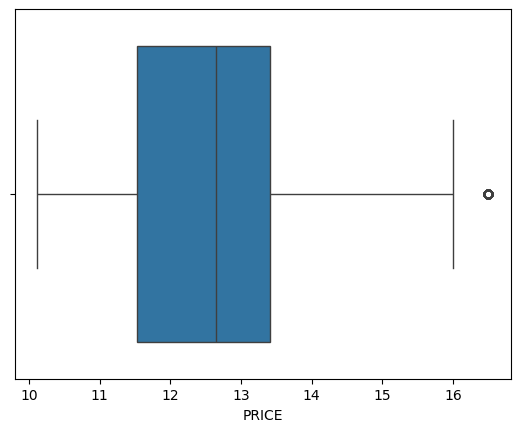

In [ ]:
sns.boxplot( x = transactions_data["PRICE"])

In [ ]:
transactions_data["PRICE"].mean()

12.869724787587735

In [ ]:
temp_oudoor=transactions_data.groupby('IS_OUTDOOR')['AVERAGE_TEMPERATURE'].value_counts()
temp_oudoor

IS_OUTDOOR  AVERAGE_TEMPERATURE
0           28.4                   156
            26.6                   132
            24.8                   112
            23.0                    92
            30.2                    88
            21.2                    64
            32.0                    24
            19.4                    24
            17.6                     8
            82.4                     8
            78.8                     8
            14.0                     8
            84.2                     4
            80.6                     4
            77.0                     4
            64.4                     4
            62.6                     4
1           80.6                   300
            32.0                   293
            78.8                   268
            73.4                   224
            77.0                   220
            82.4                   212
            75.2                   200
            71.6                

In [ ]:
temp_oudoor=transactions_data.groupby('IS_OUTDOOR')['AVERAGE_TEMPERATURE'].count()
temp_oudoor

IS_OUTDOOR
0     744
1    4670
Name: AVERAGE_TEMPERATURE, dtype: int64

In [ ]:
months_temp=transactions_data.groupby('month')['AVERAGE_TEMPERATURE'].value_counts()
months_temp

month      AVERAGE_TEMPERATURE
April      60.8                   68
           62.6                   48
           57.2                   48
           55.4                   44
           64.4                   44
                                  ..
September  62.6                   24
           64.4                   24
           60.8                   20
           59.0                   12
           77.0                   12
Name: count, Length: 167, dtype: int64

In [ ]:
months_temp=transactions_data.groupby(['HOLIDAY','CALENDAR_DATE'])['IS_OUTDOOR'].value_counts()
months_temp

HOLIDAY               CALENDAR_DATE  IS_OUTDOOR
Dragon Boat Festivel  2012-06-04     1             4
                      2012-06-05     1             4
                      2012-06-06     1             4
                      2013-06-22     1             4
                      2013-06-23     1             4
                                                  ..
Qing Ming Festival    2015-04-06     1             4
                      2015-04-07     1             4
WWII Celebration      2015-09-03     1             4
                      2015-09-04     1             4
                      2015-09-05     1             4
Name: count, Length: 1348, dtype: int64

In [ ]:
transactions_data.head()

,STORE,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,TOTAL_PRICE,weekdays,day,month,SEASONS,ITEM_NAME
0,1,2012-01-01,15.50,46,1070,0,2012,New Year,1,0,24.8,0,713.00,Sunday,1,January,Winter,Burger
1,1,2012-01-01,12.73,22,2051,2,2012,New Year,1,0,24.8,0,280.06,Sunday,1,January,Winter,Burger and Coke
2,1,2012-01-01,12.75,18,2052,2,2012,New Year,1,0,24.8,0,229.50,Sunday,1,January,Winter,Burger and Lemonade
3,1,2012-01-01,12.60,30,2053,2,2012,New Year,1,0,24.8,0,378.00,Sunday,1,January,Winter,"Burger, Coffe and Coke"
4,1,2012-01-02,15.50,70,1070,0,2012,New Year,0,0,24.8,0,1085.00,Monday,2,January,Winter,Burger


In [ ]:
burger_purchase =transactions_data[transactions_data['SELL_ID']=='BURGER']

burg_cart=burger_purchase[burger_purchase['SELL_CATEGORY']== 0]

In [ ]:
trans_burg=burg_cart.groupby(['CALENDAR_DATE', 'QUANTITY','SELL_ID'])['PRICE'].value_counts()
trans_burg

Series([], Name: count, dtype: int64)

#QUESTIONS

How does the quantity of items sold vary across different calendar dates?

In [ ]:
quantity_sales_year=transactions_data.groupby(['SELL_ID','YEAR'])['QUANTITY'].mean()
quantity_sales_year

SELL_ID  YEAR
1070     2012    80.591781
         2013    80.859459
         2014    82.005479
         2015    81.984190
2051     2012    29.326027
         2013    29.978495
         2014    28.356164
         2015    29.185771
2052     2012    19.786301
         2013    21.243243
         2014    20.898630
         2015    20.948617
2053     2012    46.432877
         2013    45.945946
         2014    45.189041
         2015    47.043478
Name: QUANTITY, dtype: float64

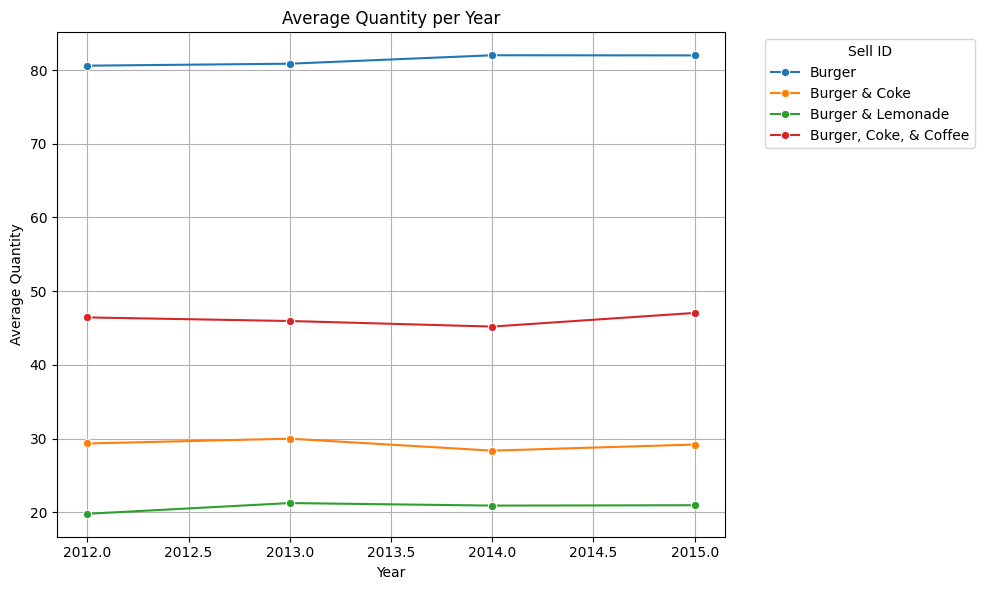

In [ ]:
# Replace the SELL_ID values with the specified items
legend_labels = {
    1070: "Burger",
    2051: "Burger & Coke",
    2052: "Burger & Lemonade",
    2053: "Burger, Coke, & Coffee"
}
transactions_data['SELL_ID'] = transactions_data['SELL_ID'].replace(legend_labels)

# Group by 'SELL_ID' and 'YEAR' and calculate the average quantity sold
avg_quantity_per_year = transactions_data.groupby(['SELL_ID', 'YEAR'])['QUANTITY'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_quantity_per_year, x='YEAR', y='QUANTITY', hue='SELL_ID', marker='o')
plt.title('Average Quantity per Year')
plt.xlabel('Year')
plt.ylabel('Average Quantity')
plt.legend(title='Sell ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


The sale of item 1070 (burger) had the highest average price of all years, user 2053 (burger and coke) was second, and the combo of burger, lemonade, and coke had the lowest average sale.


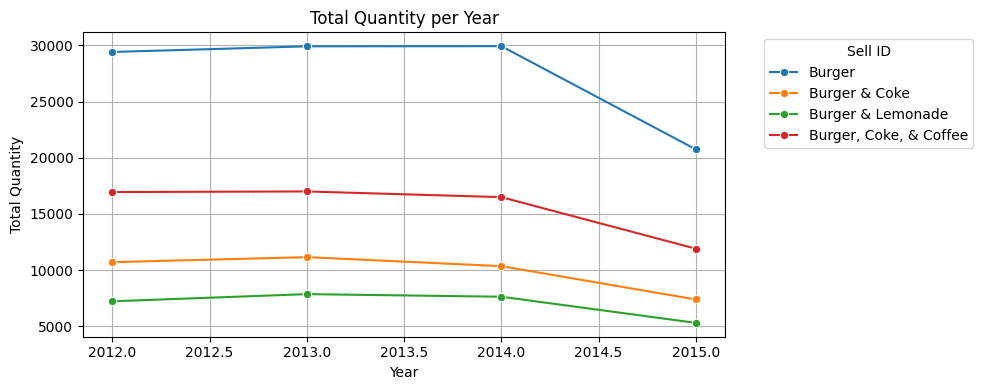

In [ ]:
# Replace the SELL_ID values with the specified items
legend_labels = {
    1070: "Burger",
    2051: "Burger & Coke",
    2052: "Burger & Lemonade",
    2053: "Burger, Coke, & Coffee"
}
transactions_data['SELL_ID'] = transactions_data['SELL_ID'].replace(legend_labels)

# Group by 'SELL_ID' and 'YEAR' and calculate the average quantity sold
avg_quantity_per_year = transactions_data.groupby(['SELL_ID', 'YEAR'])['QUANTITY'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 4))
sns.lineplot(data=avg_quantity_per_year, x='YEAR', y='QUANTITY', hue='SELL_ID', marker='o')
plt.title('Total Quantity per Year')
plt.xlabel('Year')
plt.ylabel('Total Quantity')
plt.legend(title='Sell ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

In [ ]:
quantity_sales_month=transactions_data.groupby(['SELL_ID','month'])['QUANTITY'].sum()
quantity_sales_month

SELL_ID                 month    
Burger                  April         9186
                        August       10116
                        December      8662
                        February      9262
                        January      10978
                        July          9790
                        June          9178
                        March        10232
                        May           9488
                        November      7534
                        October       7396
                        September     8186
Burger & Coke           April         3180
                        August        3730
                        December      2996
                        February      3090
                        January       3746
                        July          3702
                        June          3406
                        March         3924
                        May           3530
                        November      2712
                    

In [ ]:
quantity_sales_month=transactions_data.groupby(['SELL_ID','month'])['QUANTITY'].sum().reset_index()
sorted_sales = quantity_sales_month.sort_values(by='month')

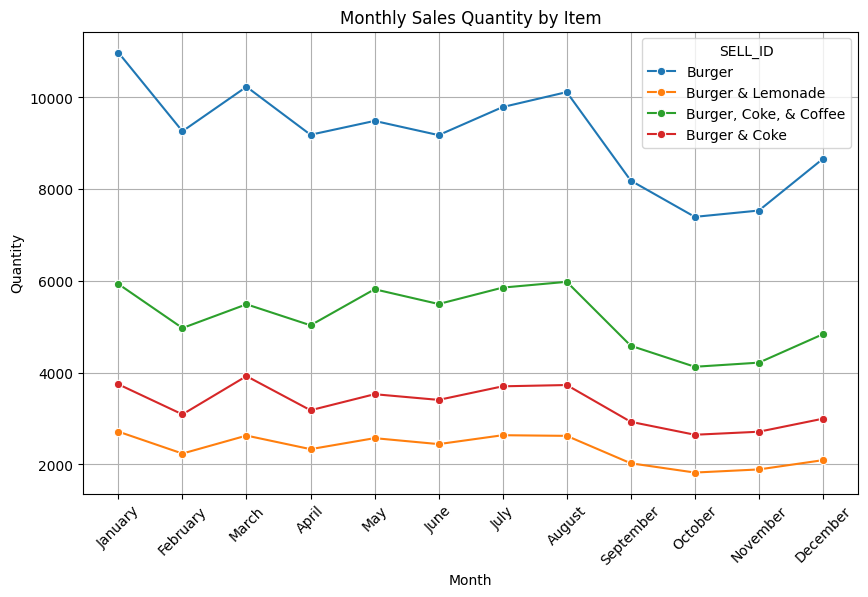

In [ ]:
# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the 'month' column
sorted_sales['month'] = pd.Categorical(sorted_sales['month'], categories=month_order, ordered=True)

# Replace the SELL_ID values with the specified items
sorted_sales['SELL_ID'] = sorted_sales['SELL_ID'].replace({
    1070: 'Burger',
    2051: 'Burger & Coke',
    2052: 'Burger & Lemonade',
    2053: 'Burger, Coffee & Coke'
})

# Sort the data by the school break months
purch_df = sorted_sales.sort_values('month')

# Plotting the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=sorted_sales, x='month', y='QUANTITY', hue='SELL_ID', marker='o', palette='tab10')
plt.title('Monthly Sales Quantity by Item')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

User 1070 (burger) had higher sales than other users throughout the past few months. More burgers were sold in November, December, and January.
During November to January and June to August there is a high point for all users.

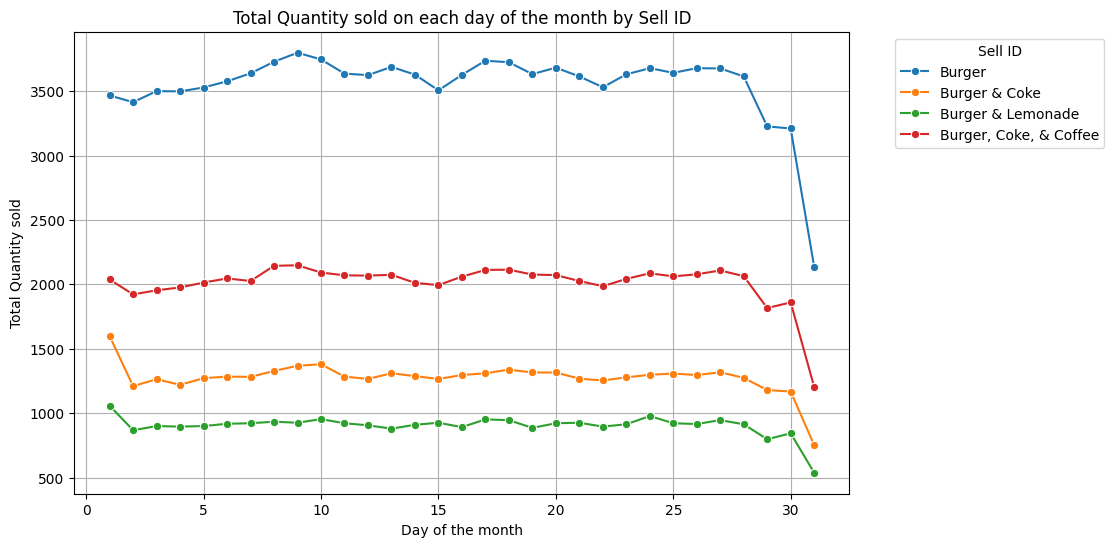

In [ ]:
# Replace the SELL_ID values with the specified items
transactions_data['SELL_ID'] = transactions_data['SELL_ID'].replace({
    1070: 'Burger',
    2051: 'Burger & Coke',
    2052: 'Burger & Lemonade',
    2053: 'Burger, Coffee & Coke'
})

# Group by 'SELL_ID' and 'day' and calculate the total quantity sold
total_quantity_per_day = transactions_data.groupby(['SELL_ID', 'day'])['QUANTITY'].sum().reset_index()

# Plotting the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_quantity_per_day, x='day', y='QUANTITY', hue='SELL_ID', marker='o', palette='tab10')
plt.title('Total Quantity sold on each day of the month by Sell ID')
plt.xlabel('Day of the month')
plt.ylabel('Total Quantity sold')
plt.legend(title='Sell ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

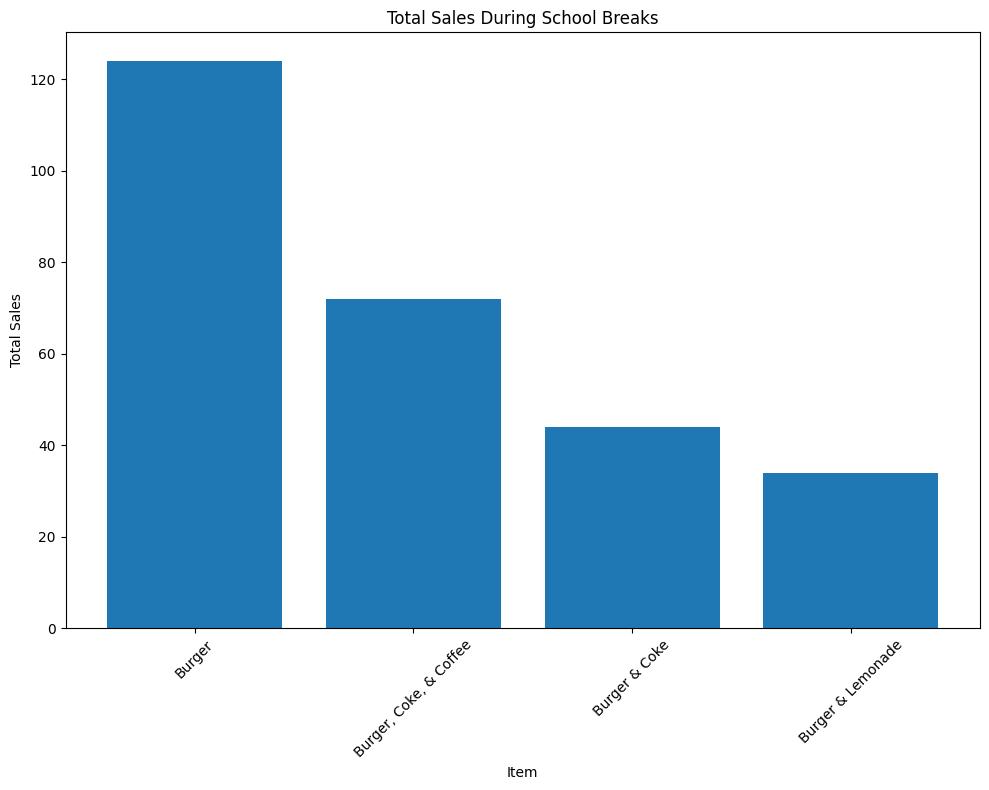

In [ ]:

# Given data
# data = {
#     'Item': ['Burger', 'Burger & Coke', 'Burger & Lemonade', 'Burger, Coffee & Coke'],
#     'Sales': [30000, 25000, 12000, 35000]
# }

# # Create DataFrame
# transactions_data = pd.DataFrame(data)

# Sort the DataFrame by 'Sales'
non_holi_sales=transactions_data[transactions_data['IS_SCHOOLBREAK']== 1]
trans_data = non_holi_sales.sort_values(by='QUANTITY', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.bar(trans_data['SELL_ID'], trans_data['QUANTITY'])
plt.title('Total Sales During School Breaks')
plt.xlabel('Item')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust subplots to give some room for the x-axis labels
plt.show()

What is the overall sales trend over the years?

In [ ]:
total_sales_per_year =transactions_data.groupby('YEAR')['TOTAL_PRICE'].sum().reset_index()
total_sales_per_year

,YEAR,TOTAL_PRICE
0,2012,863362.06
1,2013,888794.56
2,2014,873349.64
3,2015,598402.78


<ipython-input-64-dc446472297a>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=total_sales_per_year, x='YEAR', y='TOTAL_PRICE',marker='o', palette='tab10', color='skyblue')


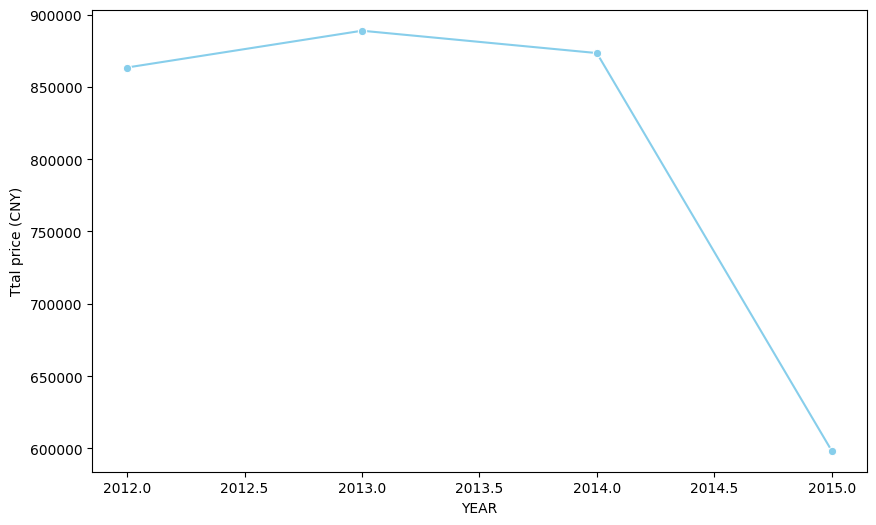

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_sales_per_year, x='YEAR', y='TOTAL_PRICE',marker='o', palette='tab10', color='skyblue')
plt.ylabel('Ttal price (CNY)')
plt.show()

2013 had the highest sales among all years, with 2014 and 2012 following closely behind, while 2015 had the lowest sales.

**Peak Days** Do sales patterns differ between weekdays and weekends?

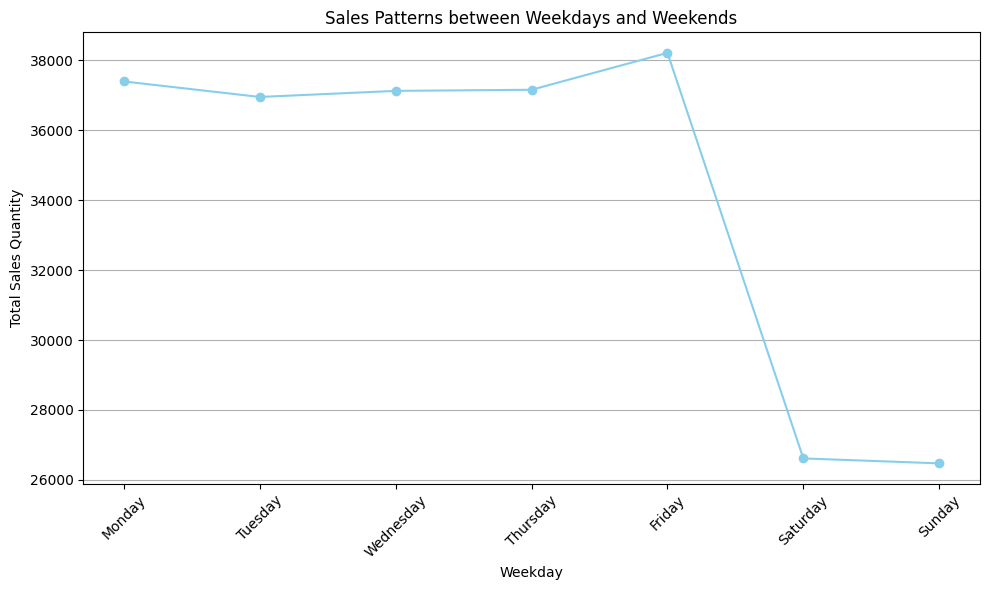

In [ ]:
transactions_data['CALENDAR_DATE'] = pd.to_datetime(transactions_data['CALENDAR_DATE'])

# Extract weekday name from the date
transactions_data['weekdays'] = transactions_data['CALENDAR_DATE'].dt.day_name()

# Define the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by weekday and calculate the sum of quantity sold
sales_by_weekday = transactions_data.groupby('weekdays')['QUANTITY'].sum().reindex(weekday_order)

# Plotting sales patterns between weekdays and weekends
plt.figure(figsize=(10, 6))
sales_by_weekday.plot(kind='line', color='skyblue', marker='o')  # Changed kind to 'line'
plt.xlabel('Weekday')
plt.ylabel('Total Sales Quantity')
plt.title('Sales Patterns between Weekdays and Weekends')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

During Holidays

Are there any noticeable sales fluctuations during school breaks?

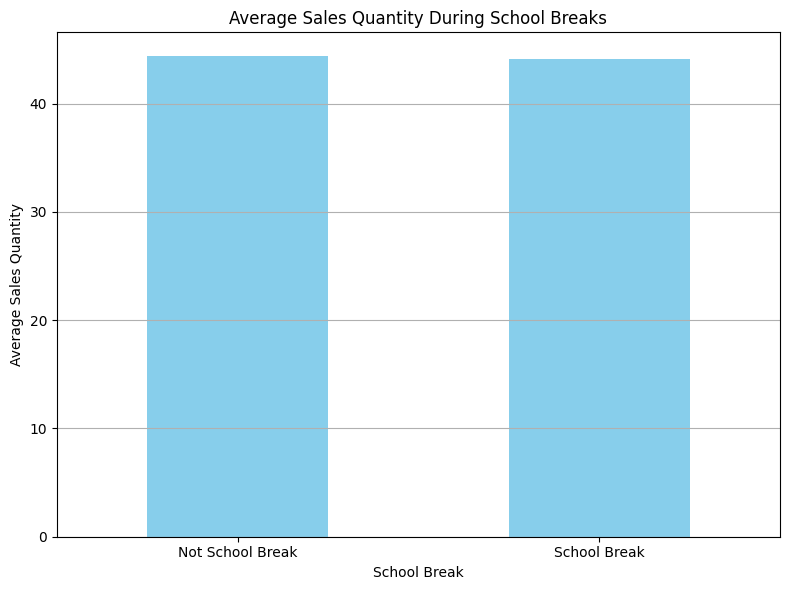

In [ ]:
# Convert the date column to datetime
transactions_data['CALENDAR_DATE'] = pd.to_datetime(transactions_data['CALENDAR_DATE'])

# Group by IS_SCHOOLBREAK and calculate average sales quantity
avg_sales_by_school_break = transactions_data.groupby('IS_SCHOOLBREAK')['QUANTITY'].mean()

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting the data
avg_sales_by_school_break.plot(kind='bar', ax=ax, color=['skyblue'])

# Adding labels and title
ax.set_xlabel('School Break')
ax.set_ylabel('Average Sales Quantity')
ax.set_title('Average Sales Quantity During School Breaks')

# Customize x-axis labels
ax.set_xticklabels(['Not School Break', 'School Break'], rotation=0)

# Show plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
data = transactions_data[transactions_data["IS_SCHOOLBREAK"] == 1]
data

,STORE,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,TOTAL_PRICE,weekdays,day,month,SEASONS,ITEM_NAME
1512,1,2013-01-14,15.50,100,Burger,0,2013,Non Holiday,0,1,30.2,0,1550.00,Monday,14,January,Winter,Burger
1513,1,2013-01-14,13.13,36,Burger & Coke,2,2013,Non Holiday,0,1,30.2,0,472.68,Monday,14,January,Winter,Burger and Coke
1514,1,2013-01-14,12.64,26,Burger & Lemonade,2,2013,Non Holiday,0,1,30.2,0,328.64,Monday,14,January,Winter,Burger and Lemonade
1515,1,2013-01-14,13.41,48,"Burger, Coke, & Coffee",2,2013,Non Holiday,0,1,30.2,0,643.68,Monday,14,January,Winter,"Burger, Coffe and Coke"
1516,1,2013-01-15,15.50,100,Burger,0,2013,Non Holiday,0,1,30.2,0,1550.00,Tuesday,15,January,Winter,Burger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,1,2015-08-30,11.26,38,"Burger, Coke, & Coffee",2,2015,Non Holiday,1,1,73.4,1,427.88,Sunday,30,August,Summer,"Burger, Coffe and Coke"
5376,1,2015-08-31,14.50,90,Burger,0,2015,Non Holiday,0,1,73.4,1,1305.00,Monday,31,August,Summer,Burger
5377,1,2015-08-31,12.19,36,Burger & Coke,2,2015,Non Holiday,0,1,73.4,1,438.84,Monday,31,August,Summer,Burger and Coke
5378,1,2015-08-31,11.50,26,Burger & Lemonade,2,2015,Non Holiday,0,1,73.4,1,299.00,Monday,31,August,Summer,Burger and Lemonade


How does the presence of holidays impact the quantity of items sold in a store?


In [ ]:
holidays_quantity_sold=transactions_data.groupby('HOLIDAY')['QUANTITY'].sum()

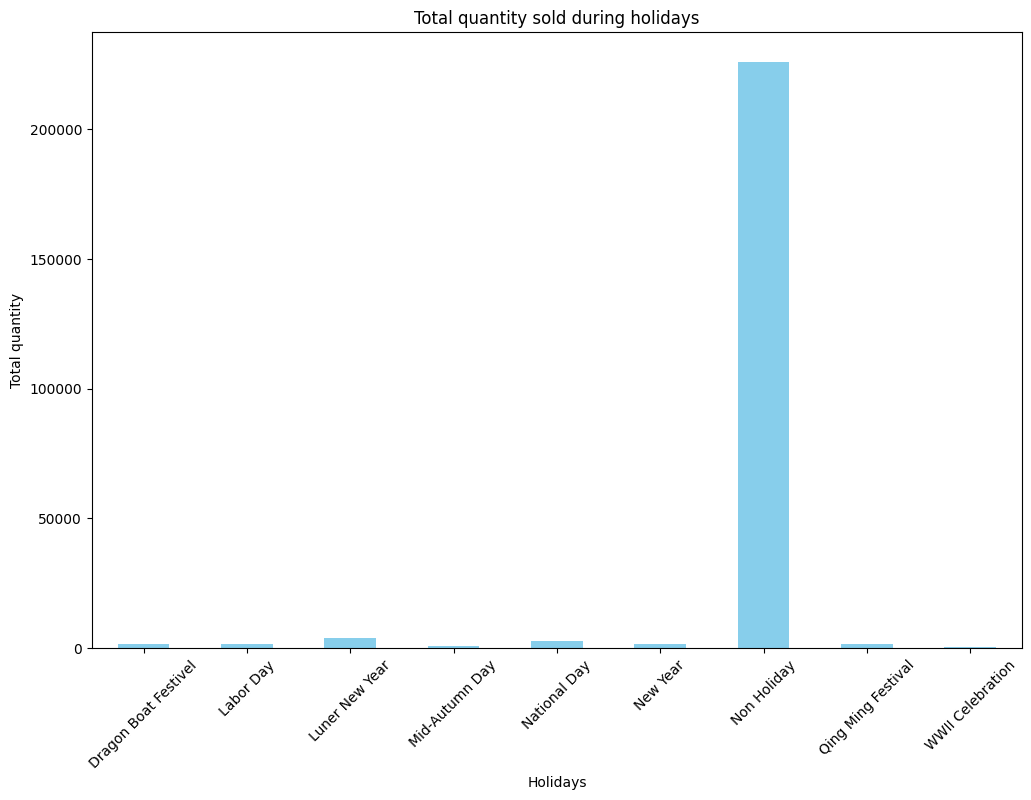

In [ ]:
plt.figure(figsize=(12, 8))
holidays_quantity_sold.plot(kind='bar',color='skyblue')
plt.title('Total quantity sold during holidays')
plt.xlabel('Holidays')
plt.ylabel('Total quantity')
plt.xticks(rotation = 45)
plt.show()

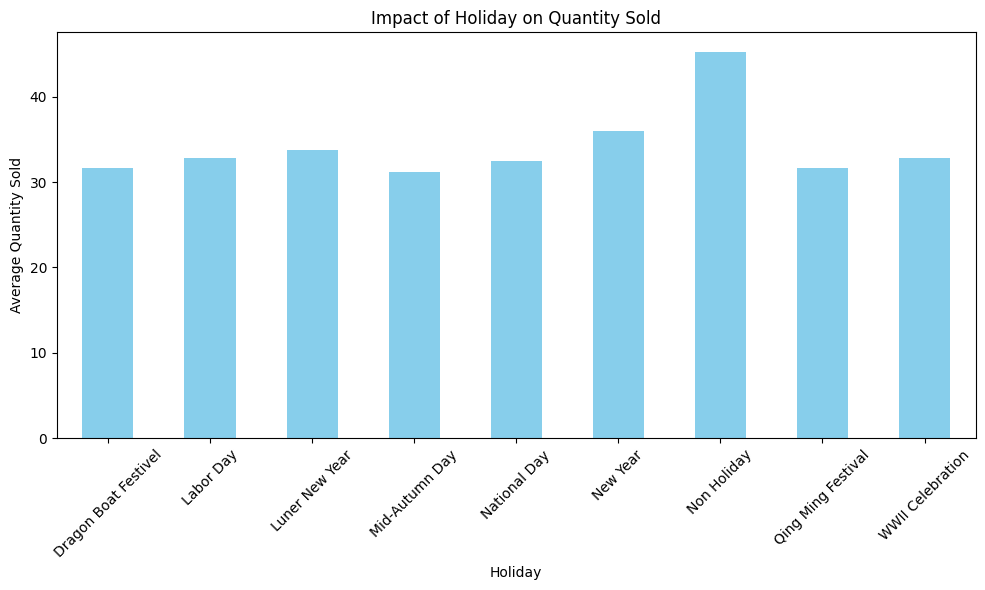

In [ ]:
# Group by HOLIDAY and calculate the average quantity
avg_quantity_by_holiday = transactions_data.groupby('HOLIDAY')['QUANTITY'].mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the data
avg_quantity_by_holiday.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Holiday')
plt.ylabel('Average Quantity Sold')
plt.title('Impact of Holiday on Quantity Sold')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

How does the presence of outdoor events or activities affect sales in a store?

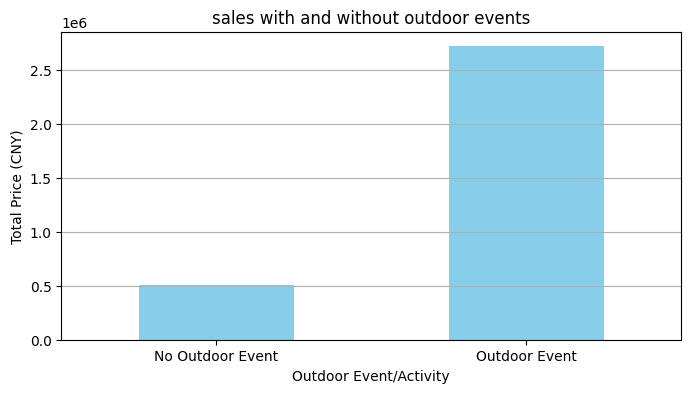

In [ ]:
sales_by_outdoor_event =transactions_data.groupby('IS_OUTDOOR')['TOTAL_PRICE'].sum()


plt.figure(figsize=(8, 4))
sales_by_outdoor_event.plot(kind='bar', color='skyblue')
plt.title('sales with and without outdoor events')
plt.xlabel('Outdoor Event/Activity')
plt.ylabel('Total Price (CNY)')
plt.xticks([0, 1], ['No Outdoor Event', 'Outdoor Event'], rotation=0)
plt.grid(axis='y')
plt.show()

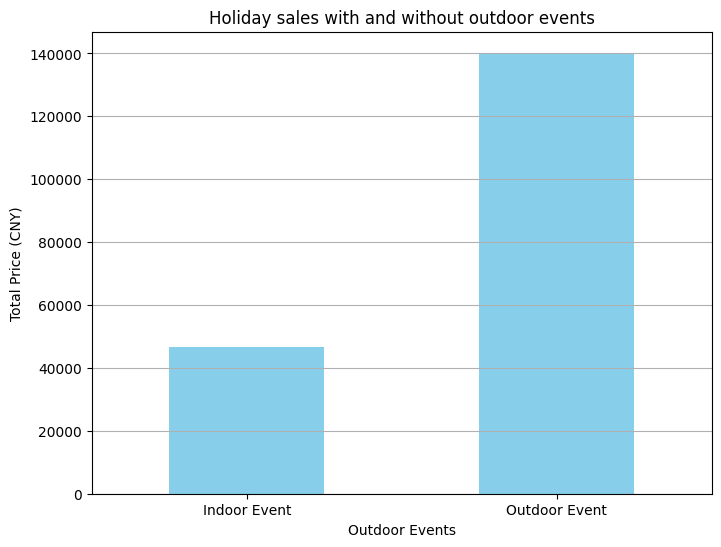

In [ ]:
sales_holid=transactions_data[~(transactions_data['HOLIDAY']== 'Non Holiday')]
sales_outdoor_event =sales_holid.groupby('IS_OUTDOOR')['TOTAL_PRICE'].sum()

plt.figure(figsize=(8, 6))
sales_outdoor_event.plot(kind='bar', color=['skyblue'])
plt.title('Holiday sales with and without outdoor events')
plt.xlabel('Outdoor Events')
plt.ylabel('Total Price (CNY)')
plt.xticks([0, 1], ['Indoor Event', 'Outdoor Event'], rotation=0)
plt.grid(axis='y')
plt.show()

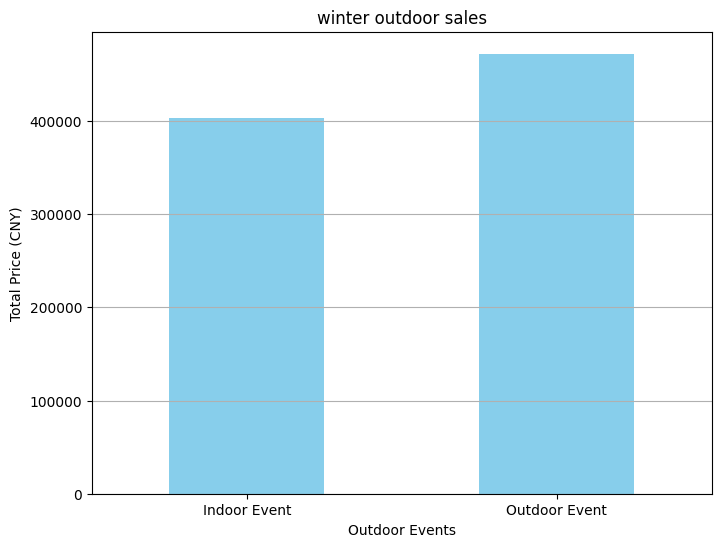

In [ ]:
sales_holid=transactions_data[transactions_data['SEASONS']== 'Winter']
sales_outdoor_event =sales_holid.groupby('IS_OUTDOOR')['TOTAL_PRICE'].sum()

plt.figure(figsize=(8, 6))
sales_outdoor_event.plot(kind='bar', color=['skyblue'])
plt.title('winter outdoor sales')
plt.xlabel('Outdoor Events')
plt.ylabel('Total Price (CNY)')
plt.xticks([0, 1], ['Indoor Event', 'Outdoor Event'], rotation=0)
plt.grid(axis='y')
plt.show()

**Weather Influence**
How does the outdoor seating availability impact sales during different weather conditions?

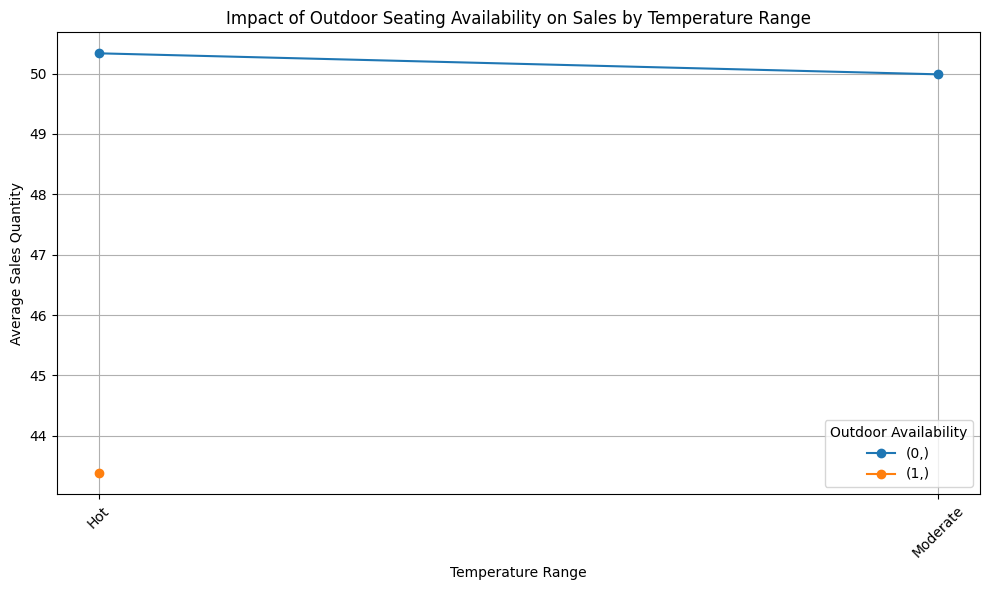

In [ ]:
 #Convert the date column to datetime
transactions_data['CALENDAR_DATE'] = pd.to_datetime(transactions_data['CALENDAR_DATE'])

# Define temperature ranges
temperature_ranges = [
    {"label": "Cold", "min_temp": -np.inf, "max_temp": 10},
    {"label": "Moderate", "min_temp": 10, "max_temp": 25},
    {"label": "Hot", "min_temp": 25, "max_temp": np.inf}
]

# Create a new column for temperature range
for temp_range in temperature_ranges:
    transactions_data.loc[(transactions_data['AVERAGE_TEMPERATURE'] >= temp_range['min_temp']) &
             (transactions_data['AVERAGE_TEMPERATURE'] < temp_range['max_temp']),
             'TEMP_RANGE'] = temp_range['label']

             # Group by temperature range and outdoor availability
grouped = transactions_data.groupby(['TEMP_RANGE', 'IS_OUTDOOR'])

# Calculate average sales for each temperature range and outdoor availability
avg_sales_by_temp_outdoor = grouped['QUANTITY'].mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the data
for key, grp in avg_sales_by_temp_outdoor.groupby(['IS_OUTDOOR']):
    ax.plot(grp['TEMP_RANGE'], grp['QUANTITY'], marker='o', label=key)

    # Adding labels and title
ax.set_xlabel('Temperature Range')
ax.set_ylabel('Average Sales Quantity')
ax.set_title('Impact of Outdoor Seating Availability on Sales by Temperature Range')
ax.legend(title='Outdoor Availability', loc='lower right')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

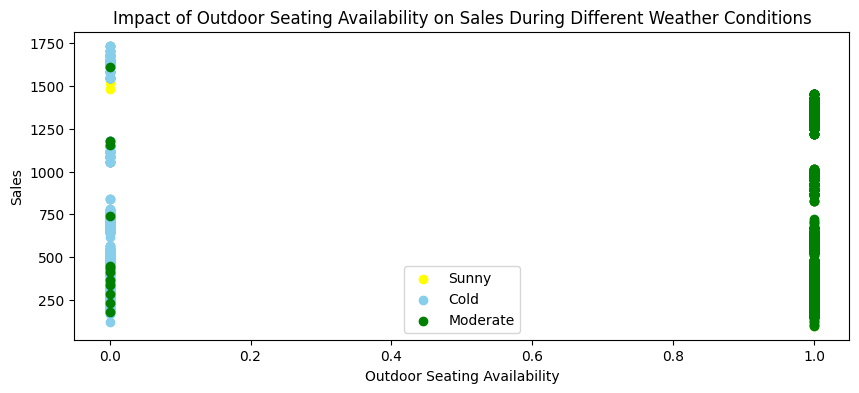

In [ ]:
# Separate data based on temperature categories
sunny_data = transactions_data[transactions_data['AVERAGE_TEMPERATURE'] > 77]
cold_data = transactions_data[transactions_data['AVERAGE_TEMPERATURE'] < 50]
moderate_data = transactions_data[(transactions_data['AVERAGE_TEMPERATURE'] >= 50) & (transactions_data['AVERAGE_TEMPERATURE'] <= 77)]

# Plotting
plt.figure(figsize=(10, 4))

# Plotting outdoor seating availability vs sales for each temperature category
plt.scatter(sunny_data['IS_OUTDOOR'], sunny_data['TOTAL_PRICE'], color='yellow', label='Sunny')
plt.scatter(cold_data['IS_OUTDOOR'], cold_data['TOTAL_PRICE'], color='skyblue', label='Cold')
plt.scatter(moderate_data['IS_OUTDOOR'], moderate_data['TOTAL_PRICE'], color='green', label='Moderate')

# Adding labels and title
plt.xlabel('Outdoor Seating Availability')
plt.ylabel('Sales')
plt.title('Impact of Outdoor Seating Availability on Sales During Different Weather Conditions')

# Adding legend
plt.legend()

# Show the plot
plt.show()

**Sales/Marketing** How does the price of items sold fluctuate over time within a store?

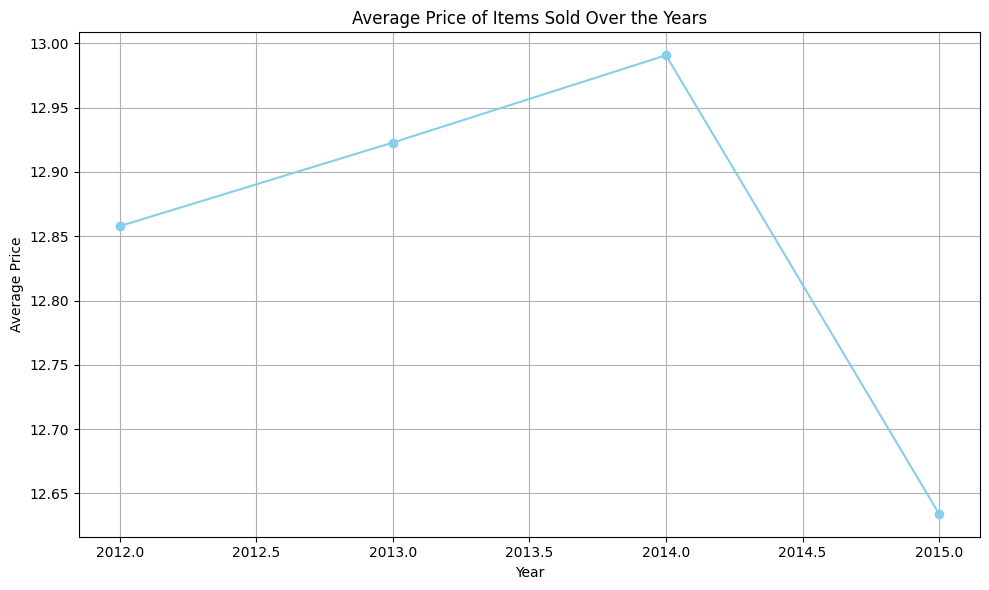

In [ ]:
transactions_data['CALENDAR_DATE'] = pd.to_datetime(transactions_data['CALENDAR_DATE'])

# Group by YEAR and calculate the average price
avg_price_by_year = transactions_data.groupby('YEAR')['PRICE'].mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the data
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o', linestyle='-', color='skyblue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price of Items Sold Over the Years')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

**Sales/Marketing** What are the seasonal trends in the quantity of items sold or the average price?

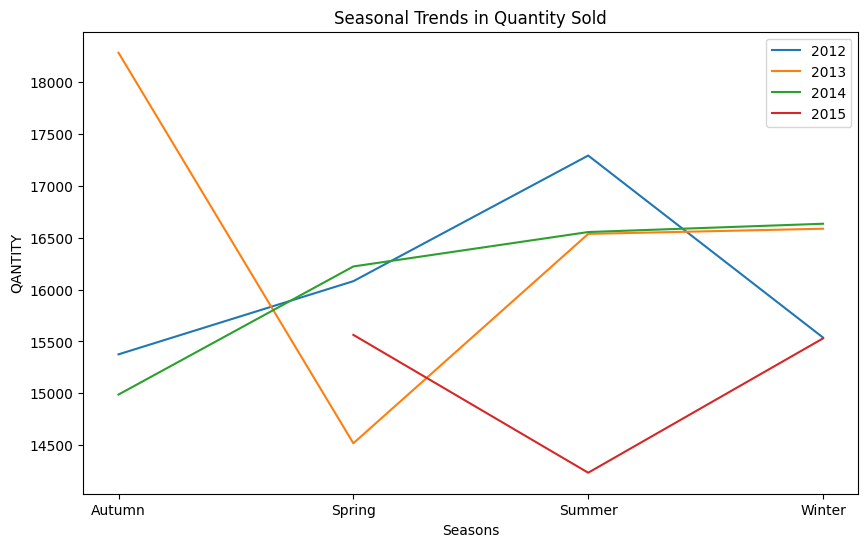

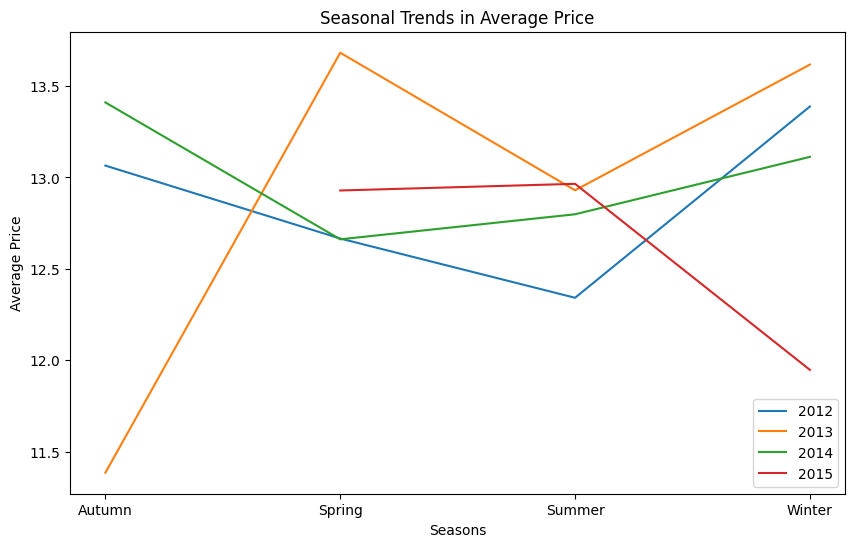

In [ ]:

# Group by month and year and calculate the mean quantity and average price
quantity_by_month = transactions_data.groupby(['SEASONS','YEAR'])['QUANTITY'].sum().reset_index()
price_by_month = transactions_data.groupby(['SEASONS','YEAR'])['PRICE'].mean().reset_index()

# Plotting quantity trends
plt.figure(figsize=(10, 6))
for year in quantity_by_month['YEAR'].unique():
    data = quantity_by_month[quantity_by_month['YEAR'] == year]
    plt.plot(data['SEASONS'], data['QUANTITY'], label=year)
plt.xlabel('Seasons')
plt.ylabel('QANTITY')
plt.title('Seasonal Trends in Quantity Sold')
plt.legend()
plt.show()

# Plotting price trends
plt.figure(figsize=(10, 6))
for year in price_by_month['YEAR'].unique():
    data = price_by_month[price_by_month['YEAR'] == year]
    plt.plot(data['SEASONS'], data['PRICE'], label=year)
plt.xlabel('Seasons')
plt.ylabel('Average Price')
plt.title('Seasonal Trends in Average Price')
plt.legend()
plt.show()


What combo's item are
most preferred by customers during the winter season?

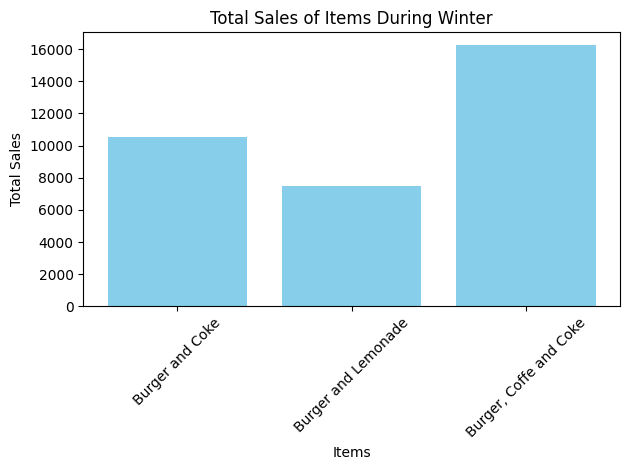

Winter Summary:
                ITEM_NAME  QUANTITY  TOTAL_PRICE
0         Burger and Coke     10550    134133.62
1     Burger and Lemonade      7460     90810.54
2  Burger, Coffe and Coke     16228    197833.38


In [ ]:
# Filter data for winter season
winter_data = transactions_data[transactions_data['SEASONS'] == 'Winter']
winter_combos=winter_data[winter_data['SELL_CATEGORY']== 2]
# Calculate total sales and total price for each item during winter
winter_summary = winter_combos.groupby('ITEM_NAME').agg({'QUANTITY': 'sum', 'TOTAL_PRICE': 'sum'}).reset_index()

# Create a bar chart
plt.bar(winter_summary['ITEM_NAME'], winter_summary['QUANTITY'], color='skyblue')
plt.xlabel('Items')
plt.ylabel('Total Sales')
plt.title('Total Sales of Items During Winter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the winter summary table
print("Winter Summary:")
print(winter_summary)

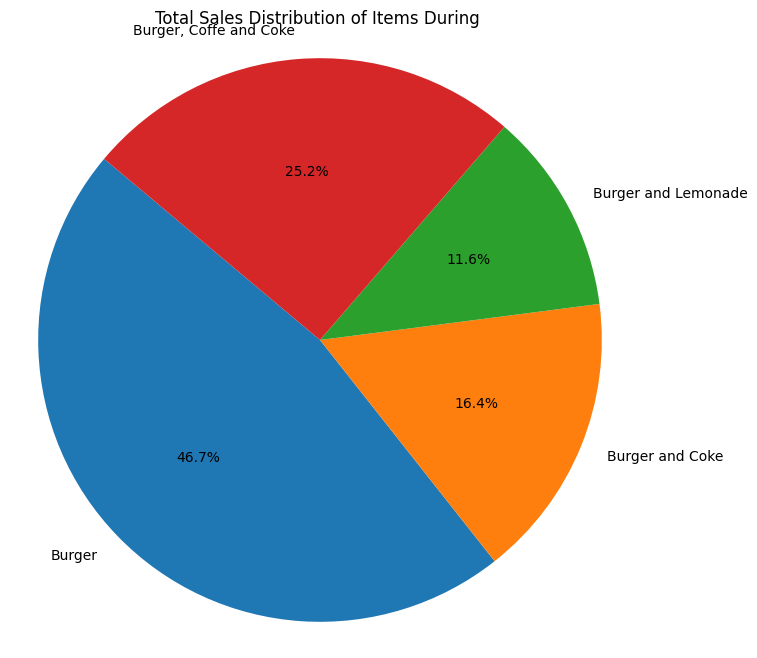

Winter Summary:
                ITEM_NAME SEASONS  QUANTITY
0                  Burger  Winter     30054
1         Burger and Coke  Winter     10550
2     Burger and Lemonade  Winter      7460
3  Burger, Coffe and Coke  Winter     16228


In [ ]:
winter_data = transactions_data[transactions_data['SEASONS'] == 'Winter']

# Calculate total sales for each item during winter
winter_summary =winter_data.groupby(['ITEM_NAME','SEASONS'])['QUANTITY'].sum().reset_index()

# Set up the pie chart
plt.figure(figsize=(8, 8))
plt.pie(winter_summary['QUANTITY'], labels=winter_summary['ITEM_NAME'], autopct='%1.1f%%', startangle=140)
plt.title('Total Sales Distribution of Items During ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

# Print the winter summary table
print("Winter Summary:")
print(winter_summary)

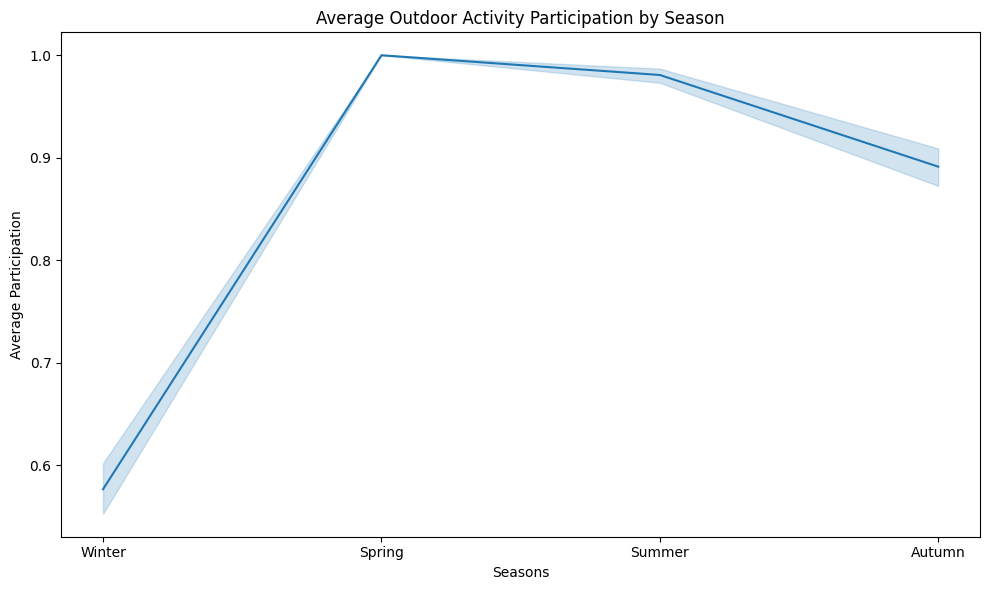

In [ ]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='SEASONS', y='IS_OUTDOOR', data=transactions_data)
plt.title('Average Outdoor Activity Participation by Season')
plt.xlabel('Seasons')
plt.ylabel('Average Participation')
plt.tight_layout()

# Show the plot
plt.show()

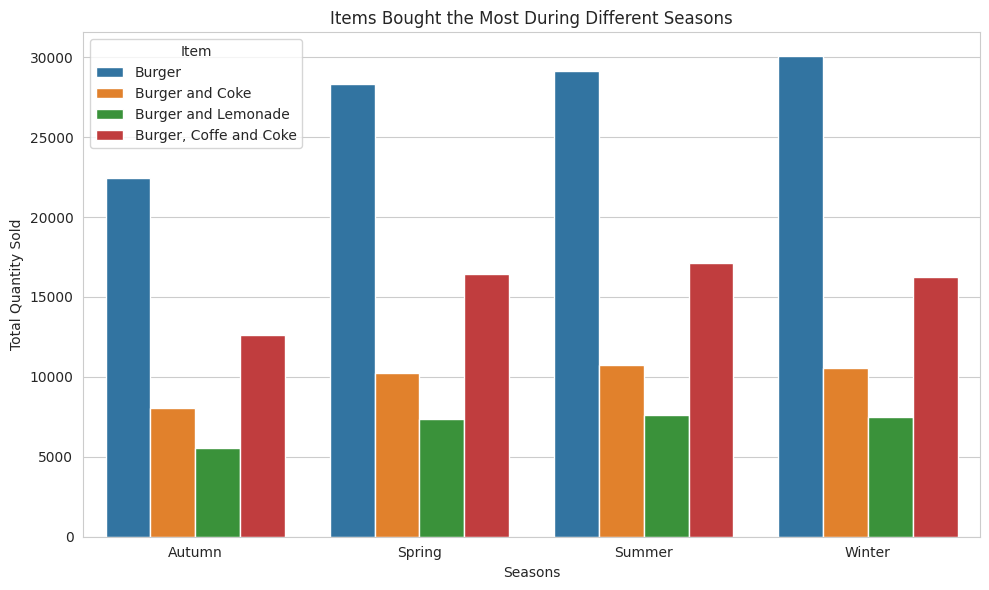

In [ ]:
# Group by seasons and items, summing up the quantities
season_item_totals = transactions_data.groupby(['SEASONS', 'ITEM_NAME'])['QUANTITY'].sum().reset_index()

# Set the style for the plot
sns.set_style("whitegrid")

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='SEASONS', y='QUANTITY', hue='ITEM_NAME', data=season_item_totals)
plt.title('Items Bought the Most During Different Seasons')
plt.xlabel('Seasons')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Item')
plt.tight_layout()

# Show the plot
plt.show()

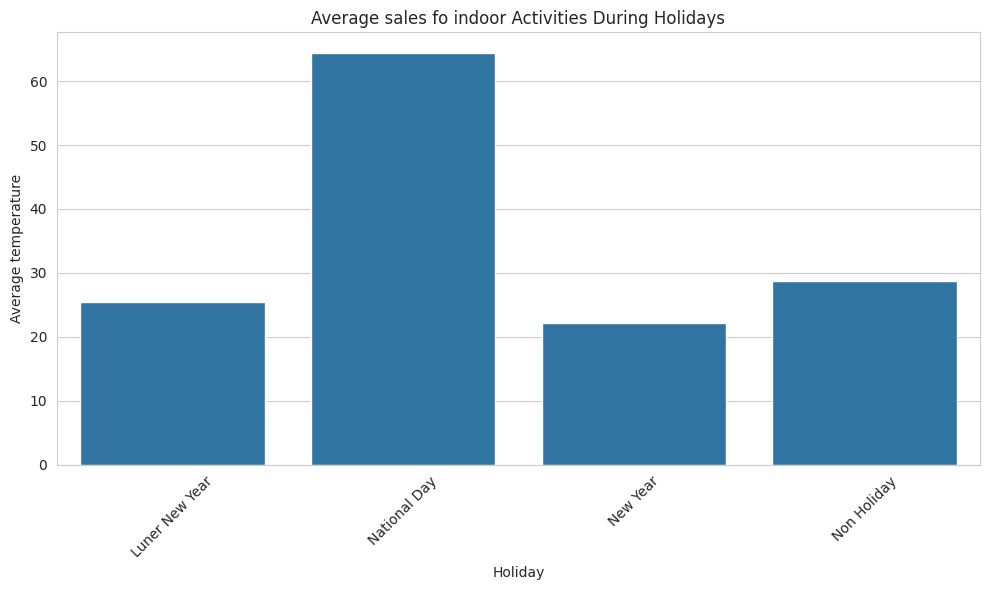

In [ ]:
holiday_outdoor_avg = transactions_data.groupby(['HOLIDAY', 'IS_OUTDOOR'])['AVERAGE_TEMPERATURE'].mean().reset_index()

# Filter only holidays associated with outdoor activities
outdoor_holidays = holiday_outdoor_avg[holiday_outdoor_avg['IS_OUTDOOR'] == 0]

# Set the style for the plot
sns.set_style("whitegrid")

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='HOLIDAY', y='AVERAGE_TEMPERATURE', data=outdoor_holidays)
plt.title('Average sales fo indoor Activities During Holidays')
plt.xlabel('Holiday')
plt.ylabel('Average temperature')
plt.xticks(rotation=45)
plt.tight_layout()

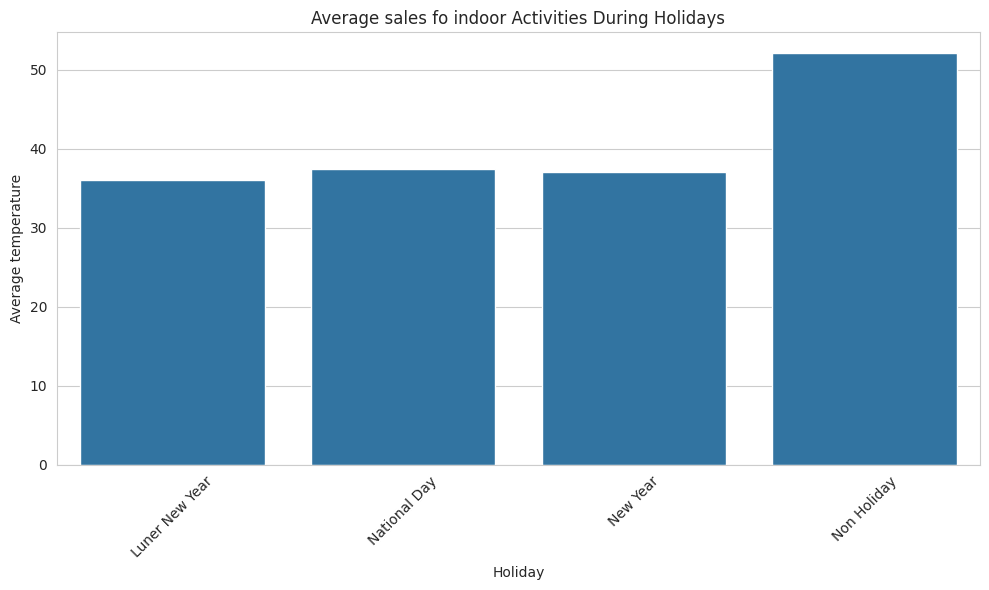

In [ ]:
holiday_outdoor_avg = transactions_data.groupby(['HOLIDAY', 'IS_OUTDOOR'])['QUANTITY'].mean().reset_index()

# Filter only holidays associated with outdoor activities
outdoor_holidays = holiday_outdoor_avg[holiday_outdoor_avg['IS_OUTDOOR'] == 0]

# Set the style for the plot
sns.set_style("whitegrid")

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='HOLIDAY', y='QUANTITY', data=outdoor_holidays)
plt.title('Average sales fo indoor Activities During Holidays')
plt.xlabel('Holiday')
plt.ylabel('Average temperature')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
items_sales=transactions_data.groupby(['SEASONS','SELL_ID','YEAR'])['PRICE']
items_sales

In [ ]:
transactions = transactions_data[transactions_data["YEAR"] >= 2014]
transactions

,STORE,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,TOTAL_PRICE,weekdays,day,month,SEASONS,ITEM_NAME,TEMP_RANGE
2948,1,2014-01-01,15.50,72,Burger,0,2014,New Year,0,0,19.4,0,1116.00,Wednesday,1,January,Winter,Burger,Moderate
2949,1,2014-01-01,13.27,22,Burger & Coke,2,2014,New Year,0,0,19.4,0,291.94,Wednesday,1,January,Winter,Burger and Coke,Moderate
2950,1,2014-01-01,11.96,20,Burger & Lemonade,2,2014,New Year,0,0,19.4,0,239.20,Wednesday,1,January,Winter,Burger and Lemonade,Moderate
2951,1,2014-01-01,12.37,44,"Burger, Coke, & Coffee",2,2014,New Year,0,0,19.4,0,544.28,Wednesday,1,January,Winter,"Burger, Coffe and Coke",Moderate
2952,1,2014-01-02,15.50,76,Burger,0,2014,New Year,0,0,14.0,0,1178.00,Thursday,2,January,Winter,Burger,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5415,1,2015-09-09,11.26,54,"Burger, Coke, & Coffee",2,2015,Non Holiday,0,0,71.6,1,608.04,Wednesday,9,September,Summer,"Burger, Coffe and Coke",Hot
5416,1,2015-09-10,14.50,96,Burger,0,2015,Non Holiday,0,0,73.4,1,1392.00,Thursday,10,September,Summer,Burger,Hot
5417,1,2015-09-10,12.19,30,Burger & Coke,2,2015,Non Holiday,0,0,73.4,1,365.70,Thursday,10,September,Summer,Burger and Coke,Hot
5418,1,2015-09-10,11.50,18,Burger & Lemonade,2,2015,Non Holiday,0,0,73.4,1,207.00,Thursday,10,September,Summer,Burger and Lemonade,Hot


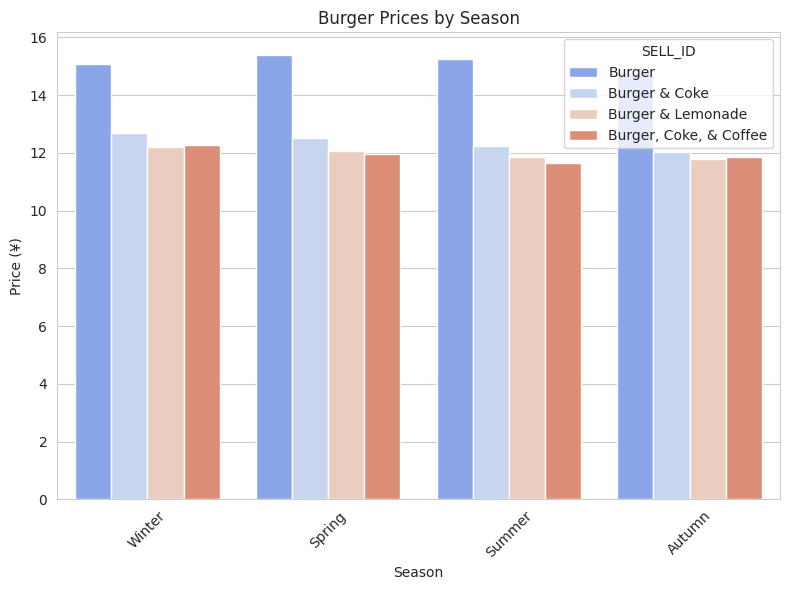

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='SEASONS', y='PRICE', hue='SELL_ID', data=transactions_data, palette='coolwarm', errorbar=None)
plt.title('Burger Prices by Season')
plt.xlabel('Season')
plt.ylabel('Price (¥)')
#plt.ylim(0, transactions_data['PRICE'].max() + 1)  # Set y-axis limit to accommodate prices
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

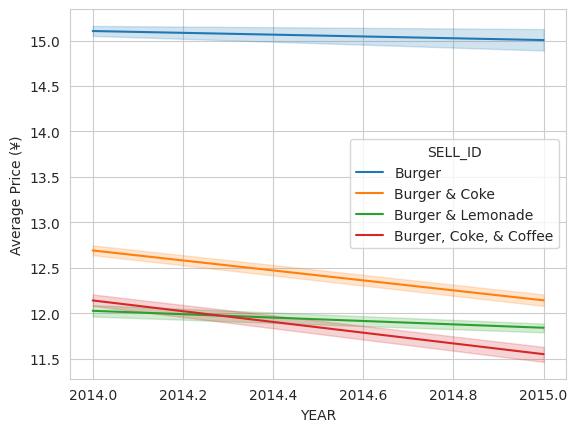

In [ ]:
sns.lineplot(data = transactions, x = 'YEAR', y = 'PRICE', hue = 'SELL_ID')
plt.ylabel('Average Price (¥)')
plt.show()

In [ ]:
selling_yearly = transactions_data.groupby(['CALENDAR_DATE', 'PRICE'])['QUANTITY'].sum().reset_index()
selling_yearly

,CALENDAR_DATE,PRICE,QUANTITY
0,2012-01-01,12.60,30
1,2012-01-01,12.73,22
2,2012-01-01,12.75,18
3,2012-01-01,15.50,46
4,2012-01-02,12.60,34
...,...,...,...
5267,2015-09-09,14.50,96
5268,2015-09-10,11.26,50
5269,2015-09-10,11.50,18
5270,2015-09-10,12.19,30


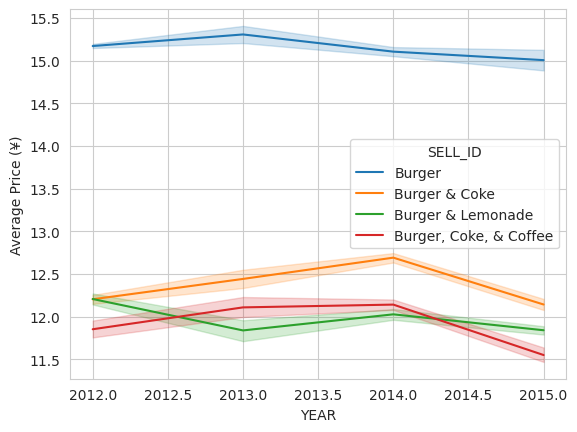

In [ ]:
sns.lineplot(data = transactions_data, x = 'YEAR', y = 'PRICE', hue = 'SELL_ID')
plt.ylabel('Average Price (¥)')
plt.show()

In [ ]:
temp = transactions_data[transactions_data["YEAR"] >= 2014 ]
temp = transactions_data.groupby(by = "YEAR")["AVERAGE_TEMPERATURE"].mean()

In [ ]:
temp

YEAR
2012    55.843836
2013    54.187854
2014    55.326027
2015    61.226877
Name: AVERAGE_TEMPERATURE, dtype: float64

During the year 2015, the temperature increased by more than 5 degrees as compared to other years. The price also decreased for some items. This may be due to a decline in sale that influenced the decline in price. The rise in temperature may have influenced the sales since it seems that more people are interested in staying indoors for the event. Also, the Dataset ends at 2015 September and do not contain the whole data for 2015


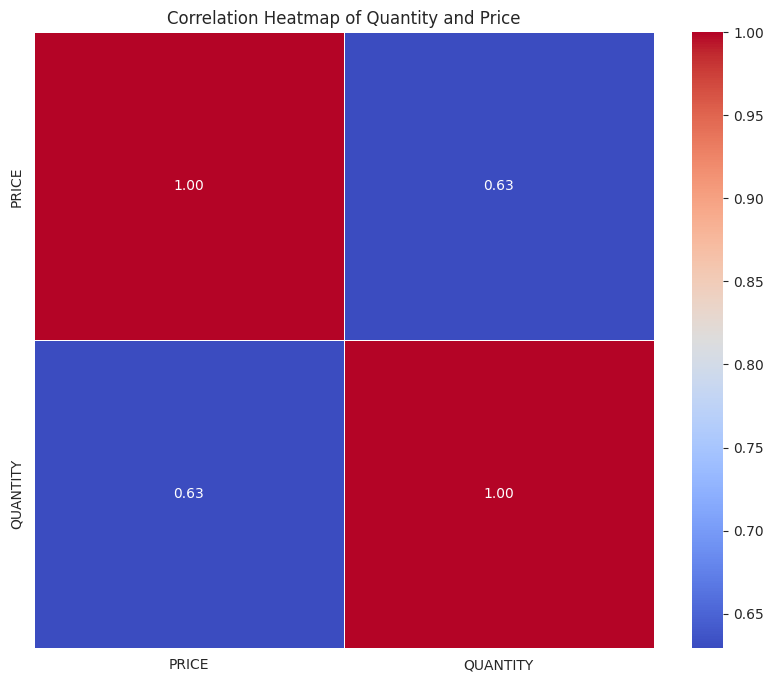

In [ ]:
#Correlation heatmap of Quantity and Price

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(transactions_data[['PRICE', 'QUANTITY']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Quantity and Price')
plt.show()

In [ ]:

# Filter data for non-school holidays and school holidays
non_school_holidays = transactions_data[transactions_data['HOLIDAY'] == 0]
school_holidays = transactions_data[transactions_data['HOLIDAY'] == 1]

# Calculate average sale for non-school holidays and school holidays
avg_sale_non_school_holidays = non_school_holidays['QUANTITY'].mean()
avg_sale_school_holidays = school_holidays['QUANTITY'].mean()

# Create DataFrame for averages
avg_df = pd.DataFrame({
    'Holiday Type': ['Non-School Holidays', 'School Holidays'],
    'Average Sale': [avg_sale_non_school_holidays, avg_sale_school_holidays]
})

# Display averages as a table
print("Average Sales Table:")
print(avg_df)

Average Sales Table:
          Holiday Type  Average Sale
0  Non-School Holidays           NaN
1      School Holidays           NaN


In [ ]:
seasonal_sales = transactions_data.groupby(['YEAR', 'SEASONS'])['TOTAL_PRICE'].sum().unstack()
print(seasonal_sales)

SEASONS     Autumn     Spring     Summer     Winter
YEAR                                               
2012     209651.10  212812.44  223394.18  217504.34
2013     220858.34  208318.72  223404.06  236213.44
2014     209162.96  214857.88  221294.64  228034.16
2015           NaN  210833.86  193756.56  193812.36


In [ ]:
# Assuming 'data' is your DataFrame
transactions_data['TOTAL_PRICE'] = transactions_data['PRICE'] * transactions_data['QUANTITY']
annual_sales = transactions_data.groupby('YEAR')['TOTAL_PRICE'].sum()
sales_2014 = annual_sales.loc[2014]
sales_2015 = annual_sales.loc[2015]
sales_decrease = sales_2014 - sales_2015
sales_decrease_percentage = (sales_decrease / sales_2014) * 100

print(f"Total Sales 2014: {sales_2014}")
print(f"Total Sales 2015: {sales_2015}")
print(f"Decrease in Sales: {sales_decrease} ({sales_decrease_percentage:.2f}%)")

Total Sales 2014: 873349.64
Total Sales 2015: 598402.78
Decrease in Sales: 274946.86 (31.48%)


In [ ]:
average_price = transactions_data.groupby( by = "ITEM_NAME")["PRICE"].mean().reset_index()
average_price

,ITEM_NAME,PRICE
0,Burger,15.159690
1,Burger and Coke,12.388347
2,Burger and Lemonade,11.988441
3,"Burger, Coffe and Coke",11.943134


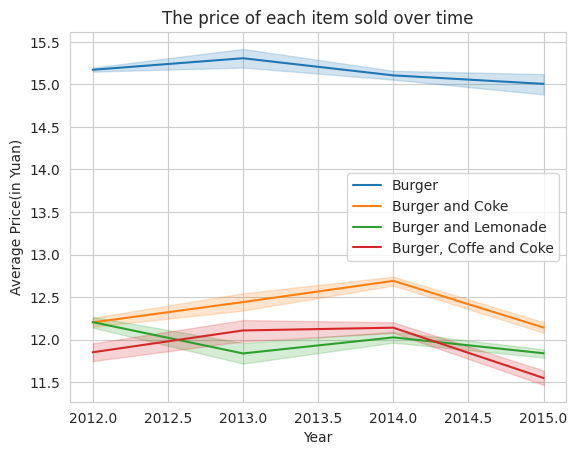

In [ ]:
sns.lineplot(data = transactions_data, x = "YEAR", y = "PRICE", hue = "ITEM_NAME")
plt.xlabel("Year")
plt.ylabel("Average Price(in Yuan)")
plt.title("The price of each item sold over time")
plt.legend()

In [ ]:
transactions_data

,STORE,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,TOTAL_PRICE,weekdays,day,month,SEASONS,ITEM_NAME,TEMP_RANGE
0,1,2012-01-01,15.50,46,Burger,0,2012,New Year,1,0,24.8,0,713.00,Sunday,1,January,Winter,Burger,Moderate
1,1,2012-01-01,12.73,22,Burger & Coke,2,2012,New Year,1,0,24.8,0,280.06,Sunday,1,January,Winter,Burger and Coke,Moderate
2,1,2012-01-01,12.75,18,Burger & Lemonade,2,2012,New Year,1,0,24.8,0,229.50,Sunday,1,January,Winter,Burger and Lemonade,Moderate
3,1,2012-01-01,12.60,30,"Burger, Coke, & Coffee",2,2012,New Year,1,0,24.8,0,378.00,Sunday,1,January,Winter,"Burger, Coffe and Coke",Moderate
4,1,2012-01-02,15.50,70,Burger,0,2012,New Year,0,0,24.8,0,1085.00,Monday,2,January,Winter,Burger,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5415,1,2015-09-09,11.26,54,"Burger, Coke, & Coffee",2,2015,Non Holiday,0,0,71.6,1,608.04,Wednesday,9,September,Summer,"Burger, Coffe and Coke",Hot
5416,1,2015-09-10,14.50,96,Burger,0,2015,Non Holiday,0,0,73.4,1,1392.00,Thursday,10,September,Summer,Burger,Hot
5417,1,2015-09-10,12.19,30,Burger & Coke,2,2015,Non Holiday,0,0,73.4,1,365.70,Thursday,10,September,Summer,Burger and Coke,Hot
5418,1,2015-09-10,11.50,18,Burger & Lemonade,2,2015,Non Holiday,0,0,73.4,1,207.00,Thursday,10,September,Summer,Burger and Lemonade,Hot


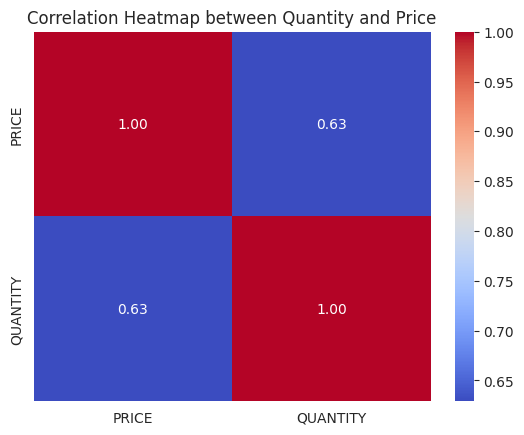

In [ ]:
correlation_price = transactions_data[["PRICE","QUANTITY"]].corr()

sns.heatmap(correlation_price, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Quantity and Price')
plt.show()

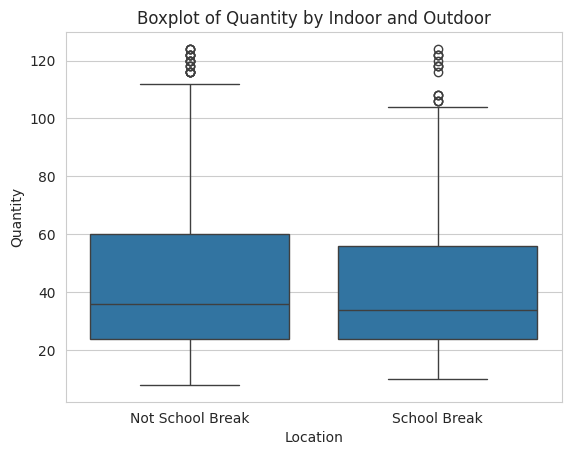

In [ ]:
# Map is_outdoor values to Indoor and Outdoor labels
transactions_data['IS_SCHOOLBREAK'] = transactions_data['IS_SCHOOLBREAK'].map({0: 'Not School Break', 1: 'School Break'})

# Plot the boxplot
sns.boxplot(x='IS_SCHOOLBREAK', y='QUANTITY', data=transactions_data)
plt.title('Boxplot of Quantity by Indoor and Outdoor')
plt.xlabel('Location')
plt.ylabel('Quantity')
plt.show()

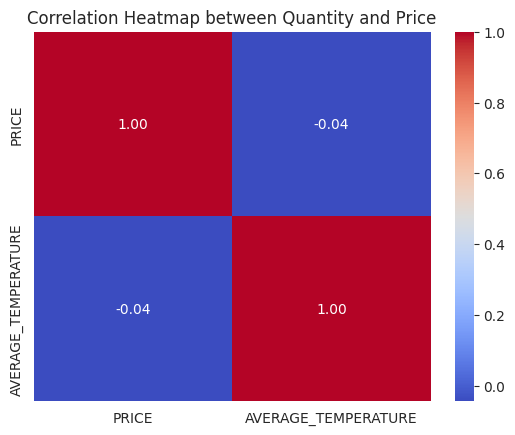

In [ ]:
correlation_price = transactions_data[["PRICE","AVERAGE_TEMPERATURE"]].corr()

sns.heatmap(correlation_price, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Quantity and Price')
plt.show()

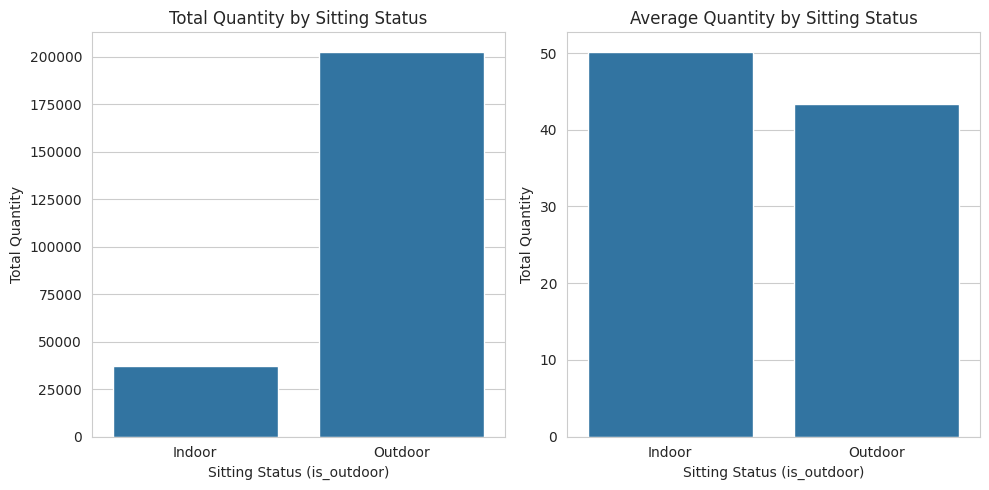

In [ ]:
# Calculate total and average quantity for each sitting status
summary_data = transactions_data.groupby('IS_OUTDOOR')['QUANTITY'].agg(['sum', 'mean']).reset_index()


# Map is_outdoor values to Indoor and Outdoor labels
summary_data['IS_OUTDOOR'] = summary_data['IS_OUTDOOR'].map({0: 'Indoor', 1: 'Outdoor'})

# Plot both barplots on the same line
plt.figure(figsize=(10, 5))

# Subplot 1: Total Quantity
plt.subplot(1, 2, 1)
sns.barplot(x='IS_OUTDOOR', y='sum', data=summary_data)
plt.title('Total Quantity by Sitting Status')
plt.xlabel('Sitting Status (is_outdoor)')
plt.ylabel('Total Quantity')

# Subplot 2: Average Quantity
plt.subplot(1, 2, 2)
sns.barplot(x='IS_OUTDOOR', y='mean', data=summary_data)
plt.title('Average Quantity by Sitting Status')
plt.xlabel('Sitting Status (is_outdoor)')
plt.ylabel('Total Quantity')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [ ]:
average_price = transactions_data.groupby( by = "YEAR")["AVERAGE_TEMPERATURE"].mean().reset_index()
average_price

,YEAR,AVERAGE_TEMPERATURE
0,2012,55.843836
1,2013,54.187854
2,2014,55.326027
3,2015,61.226877


In [ ]:
temp = transactions_data[transactions_data["YEAR"] == 2015]
temp

,STORE,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,TOTAL_PRICE,weekdays,day,month,SEASONS,ITEM_NAME,TEMP_RANGE
4408,1,2015-01-01,14.00,66,Burger,0,2015,New Year,0,Not School Break,37.4,1,924.00,Thursday,1,January,Winter,Burger,Hot
4409,1,2015-01-01,11.53,24,Burger & Coke,2,2015,New Year,0,Not School Break,37.4,1,276.72,Thursday,1,January,Winter,Burger and Coke,Hot
4410,1,2015-01-01,11.45,20,Burger & Lemonade,2,2015,New Year,0,Not School Break,37.4,1,229.00,Thursday,1,January,Winter,Burger and Lemonade,Hot
4411,1,2015-01-01,10.81,36,"Burger, Coke, & Coffee",2,2015,New Year,0,Not School Break,37.4,1,389.16,Thursday,1,January,Winter,"Burger, Coffe and Coke",Hot
4412,1,2015-01-02,14.00,102,Burger,0,2015,Non Holiday,0,Not School Break,37.4,1,1428.00,Friday,2,January,Winter,Burger,Hot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5415,1,2015-09-09,11.26,54,"Burger, Coke, & Coffee",2,2015,Non Holiday,0,Not School Break,71.6,1,608.04,Wednesday,9,September,Summer,"Burger, Coffe and Coke",Hot
5416,1,2015-09-10,14.50,96,Burger,0,2015,Non Holiday,0,Not School Break,73.4,1,1392.00,Thursday,10,September,Summer,Burger,Hot
5417,1,2015-09-10,12.19,30,Burger & Coke,2,2015,Non Holiday,0,Not School Break,73.4,1,365.70,Thursday,10,September,Summer,Burger and Coke,Hot
5418,1,2015-09-10,11.50,18,Burger & Lemonade,2,2015,Non Holiday,0,Not School Break,73.4,1,207.00,Thursday,10,September,Summer,Burger and Lemonade,Hot


In [113]:
correlation_price = transactions_data[["PRICE","QUANTITY"]].corr()
correlation_price

,PRICE,QUANTITY
PRICE,1.000000,0.629118
QUANTITY,0.629118,1.000000


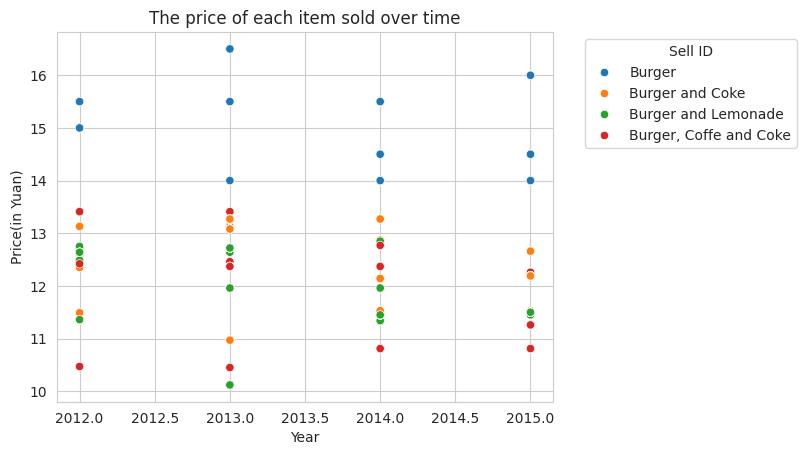

In [112]:
sns.scatterplot(data = transactions_data, x = "YEAR", y = "PRICE", hue='ITEM_NAME')
plt.xlabel("Year")
plt.ylabel("Price(in Yuan)")
plt.title("The price of each item sold over time")
plt.legend(title='Sell ID', bbox_to_anchor=(1.05, 1), loc='upper left')

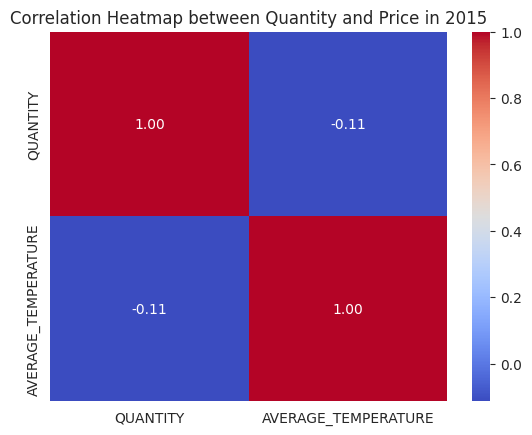

In [111]:
correlation_price = temp[["QUANTITY","AVERAGE_TEMPERATURE"]].corr()

sns.heatmap(correlation_price, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Quantity and Price in 2015')
plt.show()